<a href="https://colab.research.google.com/github/monica-carlotti/Statistical-Analysis-for-Data-Science/blob/main/Plant_Poll_Dynamics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploring of Plant-Pollinator Dynamics

**Exploring of Plant-Pollinator Dynamics: Floral Abundance, Pollinator Visits and Nectar Characteristics across Plant Species and Subplot Types**

*Monica Carlotti*
🌱🐝



# Introduction
Climate change poses a significant threat to the delicate balance of ecosystems, particularly impacting insect pollinators which are crucial to maintain plant diversity.
The anticipated increase in drought conditions, a consequence of climate change, could in fact disrupt the availability of floral resources which are crucial for sustaining pollinator populations. Potential alterations in the pollinator-plant interaction could disrupt fragile ecosystems.

This study focuses on the potential effects of climate change, simulating the effect of drought on plant species and pollinator dynamics in a calcareous grassland area in the UK.

The authors of the dataset recorded variables such as the number of flowers, nectar quantity and quality, proportion of flowers containing nectar as well as the number of insect visits and types of pollinators.  
The dataset aims to explore how pollinator foraging behaviour might change under different conditions. For instance, variations in the number of flowers or changes in nectar quantity and quality which can lead to a decline in pollinator visits.

My analysis spans multiple dimensions of the plant-pollinator interaction. I initially investigate the correlation between the number of flowers and insect visits, followed by an analysis of nectar attributes of quantity and quality and exploring the proportion of flowers containing nectar.

This analysis aims to contribute to a deeper understanding of the intricate interplay between climate change and pollinator dynamics.


# Description of the dataset

The dataset used for this study is composed of four data sheets with different focuses. The first focuses on floral survey, the second on pollinator surveys and the third and fourth on nectar.

The datasets investigate the impacts of experimental drought and plant trait diversity on floral resources and pollinator visitation in calcareous grasslands.
Three functional groups (FG1, FG2, FG3) comprising 51 plant species were classified based on traits related to root structure, leaf characteristics, nutrient cycling, and drought resistance. The authors hypoesised that FG2 and FG3 had higher restistance to drought.
These functional groups were arranged in seven experimental plant communities (FG1, FG2, FG3, FG12, FG23, FG13, FG123), each representing unique combinations of the functional groups.
The study emplyed a grid layout, with plots randomly assigned a plot and divided into six rows over a slope.

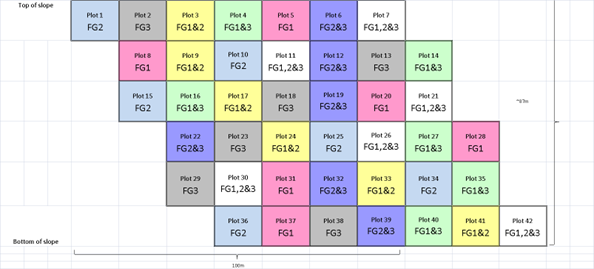

Within each plot, three subplots with one of three tratments: (i) Drought (D) - covered with a transparent roof to simulate drought by excluding rain; (ii) Control (C) - not covered with a roof; and (iii) Roofed control (R) - covered with a transparent roof featuring 5 cm holes to permit rain passage while controlling for potential roof effects such as increased temperature and decreased light intensity.

#Part I. Import Libraries and Load Data

In [1]:
pip install -r https://raw.githubusercontent.com/intro-stat-learning/ISLP_labs/v2/requirements.txt

In [2]:
#Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import subplots
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.outliers_influence \
     import variance_inflation_factor as VIF
from statsmodels.stats.anova import anova_lm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from ISLP import load_data
from ISLP.models import (ModelSpec as MS,
                         summarize,
                         poly)
import scipy.stats as stats
from scipy.stats import binom
from scipy.stats import ttest_ind
from scipy.stats import kruskal
from scipy.stats import f_oneway
from scipy.stats import f
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, roc_curve, auc
from sklearn.metrics import classification_report


In [3]:
#Clone my Github repository
!git clone https://github.com/monica-carlotti/Statistical-Analysis-for-Data-Science

Cloning into 'Statistical-Analysis-for-Data-Science'...
remote: Enumerating objects: 6, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 6 (delta 0), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (6/6), 22.91 KiB | 3.82 MiB/s, done.


In [4]:
cd Statistical-Analysis-for-Data-Science

/content/Statistical-Analysis-for-Data-Science


In [5]:
# Read csv file into renamed Pandas dataframes
df1Floral = pd.read_csv("NERCFloralSurveys.csv")
df2Nectar = pd.read_csv("NERCNectar.csv")
df3Poll = pd.read_csv("NERCPollinatorSurveys.csv")
df4PropNectar = pd.read_csv ("NERCPropNectar.csv")

In [6]:
ls

NERCFloralSurveys.csv  NERCNectar.csv  NERCPollinatorSurveys.csv  NERCPropNectar.csv


In [7]:
!git status

On branch main
Your branch is up to date with 'origin/main'.

nothing to commit, working tree clean


# Part II. Floral Surveys


This dataset records the number of flowers and the number of insect visits for each plant species in different subplot types.

I start my analysis by looking at the data, changing the name of columns for better readability and dropping missing values.

In [8]:
# Check the head of the data
df1Floral.head()

,Row,Plot_ID,FG,FG_Diversity,Date_Surveyed,Subplot_Type,SubplotID,Survey_Number,SurveyID,IP_PlantSppRich,...,Sonchus_oleraceus,Thymus_praecox,Thymus_pulegoides,Trifolium_campestre,Trifolium_dubium,Trifolium_pratense,Trifolium_repens,Veronica_agrestis,Vicia_cracca,Vicia_sativa
0,1,1,2,1,20-Jul-16,C,1.C,1,1.C.1,10,...,0,37,0,0,0,5,1,0,0,0
1,1,1,2,1,20-Jul-16,D,1.D,1,1.D.1,7,...,0,0,0,0,0,0,0,0,0,0
2,1,1,2,1,20-Jul-16,R,1.R,1,1.R.1,6,...,0,0,0,0,0,2,0,0,0,0
3,1,2,3,1,20-Jul-16,C,2.C,1,2.C.1,7,...,0,0,0,0,0,0,0,0,120,0
4,1,2,3,1,20-Jul-16,D,2.D,1,2.D.1,7,...,0,0,0,0,0,0,0,0,15,0


In [9]:
# Change name of columns
df1Floral.rename(columns={'IP_PlantSppRich':'InsectPollinatedPlants'}, inplace=True)
df1Floral.rename(columns={'Plot_ID':'PlotID'}, inplace=True)


In [10]:
# Remove rows with missing values
df1Floral.dropna(inplace=True)
df1Floral.shape

(179, 57)

First, I want to analyse the effect of the subplot conditions (drought, control and roofed) on the different experimental plant communities. There are three Functional Groups (FG1, FG2, FG3) which consisted of a number of plant species grouped together because of similar characteristics. Each functional group was planted in combination with the other functional groups resulting in seven experimental plant communities:

1. FG1
2. FG2
3. FG3
4. FG12
5. FG13
6. FG23
7. FG123


In [11]:
#Create groups for the different plant communities
fg_groups = ['FG_1', 'FG_2', 'FG_3', 'FG_12', 'FG_23', 'FG_13', 'FG_123']

Columns 12 to 57 in the data represent the number of floral units recorded for each plant species. A floral unit was defined bt the data collectors as one or multiple flowers that can be visited by an insect without having to fly between them (following Baldock et al., 2015).
I want to sum the floral units for each row of data.

In [12]:
#Sum columns 12 to 57 to obtain the number of floral units for each row
df1Floral['TotalFloralUnits'] = df1Floral.iloc[:, 11:57 + 1].sum(axis=1)

Now I want to classify the number of floral units for each type of subplot (Drought, Control and Roofed) and for each FG (fuctional group) of plant species.

In [13]:
#Group the floral units by FG and Subplot type
grouped_totals = df1Floral.groupby(['FG', 'Subplot_Type'])['TotalFloralUnits'].sum().reset_index()
print(grouped_totals)


     FG Subplot_Type  TotalFloralUnits
0     1            C               825
1     1            D               408
2     1            R               923
3     2            C              1446
4     2            D               686
5     2            R               773
6     3            C              3205
7     3            D               870
8     3            R              1411
9    12            C              1425
10   13            C               998
11   23            C              3088
12  123            C              1155
13  123            D               523
14  123            R              1142


This gives me the total foral units for each FG type and for type of subplot. Notice that groups FG12, FG13 and FG23 are only tested on subplot type C (control). I will exclude them from now. I want to show the remainder FG groups in a plot to visualise how the number of floral units changes.

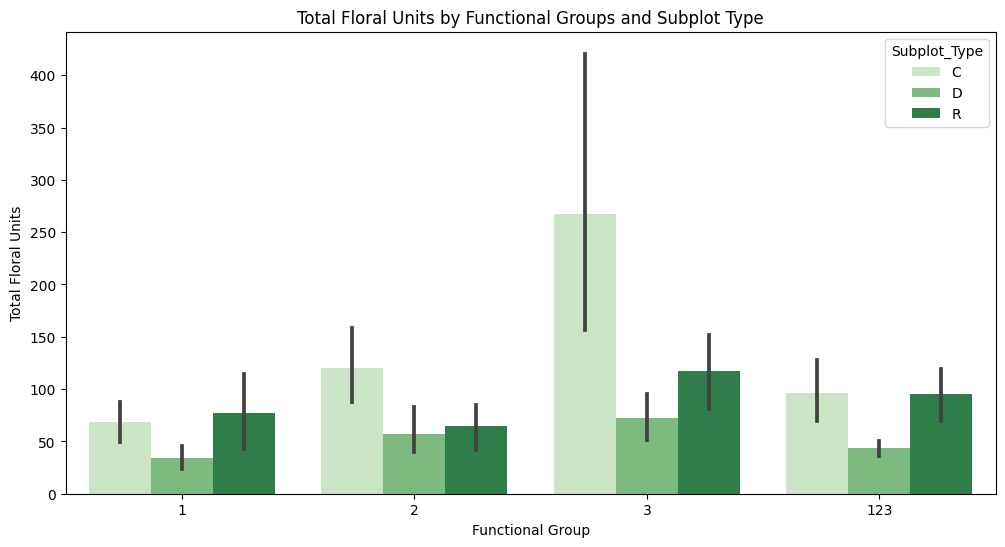

In [14]:
# Filter for FG groups 1, 2, 3 and 123
selected_fg = [1, 2, 3, 123]
subset_fg = df1Floral[df1Floral['FG'].isin(selected_fg)]

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x='FG', y='TotalFloralUnits', hue='Subplot_Type', data=subset_fg, palette='Greens')

#Labels and title
plt.xlabel('Functional Group')
plt.ylabel('Total Floral Units')
plt.title('Total Floral Units by Functional Groups and Subplot Type')

# Show the plot
plt.show()



After having visalised it, I want to check whether there is a statistically significant difference in total flower units between the functional groups, regardless on subplot type.

In [15]:
selected_fg = [1, 2, 3, 123]

# Select FG groups
subset_fg = df1Floral[df1Floral['FG'].isin(selected_fg)]

# Perform ANOVA
anova_results = f_oneway(subset_fg[subset_fg['FG'] == 1]['TotalFloralUnits'],
                         subset_fg[subset_fg['FG'] == 2]['TotalFloralUnits'],
                         subset_fg[subset_fg['FG'] == 3]['TotalFloralUnits'],
                         subset_fg[subset_fg['FG'] == 123]['TotalFloralUnits'])

# Print ANOVA results
print(f'ANOVA Results - F-statistic: {anova_results.statistic}, p-value: {anova_results.pvalue}')


ANOVA Results - F-statistic: 6.4478859502235695, p-value: 0.00040328080526777683


The ANOVA results indicate that there is a statistically significant difference in total floral units among the different FG groups (FG1, FG2, FG3, and FG123).

Now I want to check whether there is a statistically significant difference in total flower units between the subplot types.

In [16]:
# Perform ANOVA
anova_results = f_oneway(
    subset_fg[subset_fg['Subplot_Type'] == 'C']['TotalFloralUnits'],
    subset_fg[subset_fg['Subplot_Type'] == 'D']['TotalFloralUnits'],
    subset_fg[subset_fg['Subplot_Type'] == 'R']['TotalFloralUnits']
)

# Print ANOVA results
print(f'ANOVA Results - F-statistic: {anova_results.statistic}, p-value: {anova_results.pvalue}')


ANOVA Results - F-statistic: 9.777003248705308, p-value: 0.00010559820663943094


With a small p-value, I can reject the null hypothesis. It suggests that there is a statistically significant difference in the mean floral units among the different subplot types.
Next, I want to check whether drought is significantly different from control and roofed.

In [17]:
pairwise_df = subset_fg[['TotalFloralUnits', 'Subplot_Type']]

# Perform Tukey's HSD test
tukey_results = pairwise_tukeyhsd(pairwise_df['TotalFloralUnits'], pairwise_df['Subplot_Type'])

print(tukey_results)



 Multiple Comparison of Means - Tukey HSD, FWER=0.05  
group1 group2 meandiff p-adj    lower    upper  reject
------------------------------------------------------
     C      D -86.3333 0.0001 -132.7516 -39.915   True
     C      R  -49.625 0.0331  -96.0433 -3.2067   True
     D      R  36.7083 0.1503     -9.71 83.1266  False
------------------------------------------------------


There are significant differences in total floral units between Control vs. Drought and Control vs. Roofed subplot types, but no significant difference between Drought vs. Roofed subplot types.

The authors hypotesed that Functional Groups 2 and 3 consisted of species which would have better resistance to drought. I want to check if there is a statistically significant difference in number of floral units in Drought conditions between the Functional Groups.

ANOVA Results - F-statistic: 3.362176268053236, p-value: 0.02696816152922247
There is a statistically significant difference in number of floral units in Drought between the Functional groups.






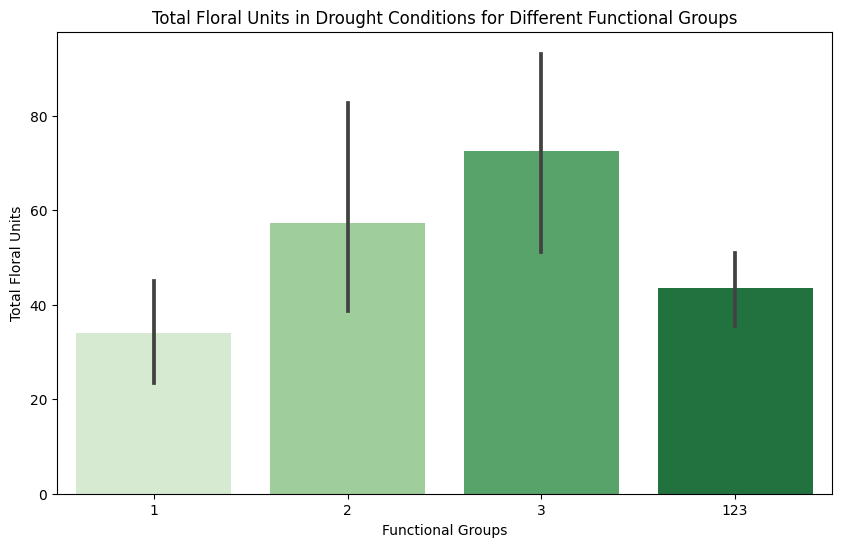

In [18]:
selected_fg = [1, 2, 3, 123]

# Filter for drought only (D) + selected all FG groups
drought_fg = df1Floral[(df1Floral['Subplot_Type'] == 'D') & (df1Floral['FG'].isin(selected_fg))]

# Perform ANOVA
anova_results = f_oneway(drought_fg[drought_fg['FG'] == 1]['TotalFloralUnits'],
                         drought_fg[drought_fg['FG'] == 2]['TotalFloralUnits'],
                         drought_fg[drought_fg['FG'] == 3]['TotalFloralUnits'],
                         drought_fg[drought_fg['FG'] == 123]['TotalFloralUnits'])
print(f'ANOVA Results - F-statistic: {anova_results.statistic}, p-value: {anova_results.pvalue}')

# Check
p = 0.05
if anova_results.pvalue < p:
    print('There is a statistically significant difference in number of floral units in Drought between the Functional groups.')
else:
    print('There is no statistically significant difference in number of floral units in Drought between the Functional groups.')

print("\n")
print("\n")

# Bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='FG', y='TotalFloralUnits', data=drought_fg, palette='Greens')
plt.xlabel('Functional Groups')
plt.ylabel('Total Floral Units')
plt.title('Total Floral Units in Drought Conditions for Different Functional Groups')
plt.show()

There is a statistically significant difference in the number of floral units in drought conditions between different functional groups. This could be due to FG2 and FG3 species being more resistant to drought.

As seen by printing grouped_totals, Functional Groups 1&2, 2&3 and 1&3 are only used in control subplots. I want to check whether in normal conditions (Control) there is a difference in floral units between the functional groups.

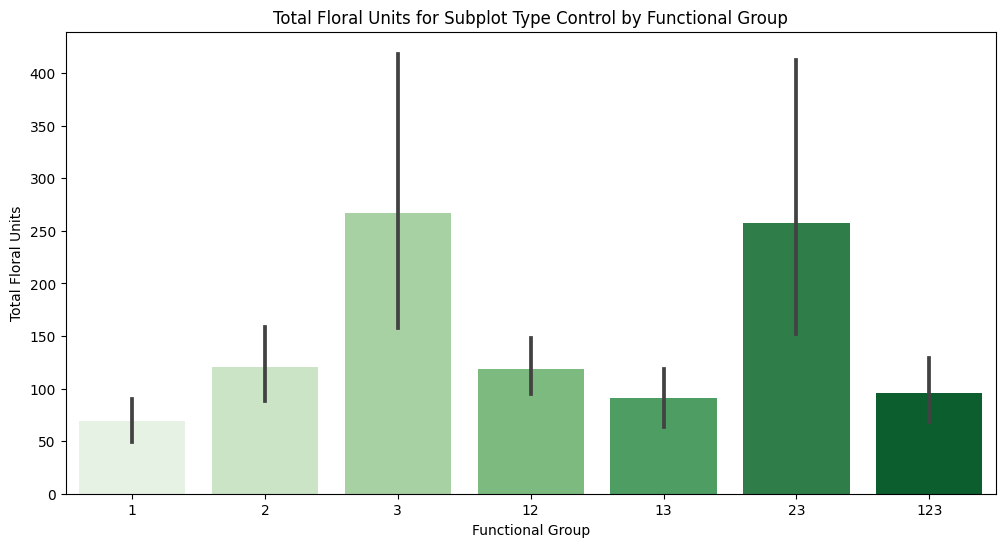

In [19]:
# Select only rows where 'Subplot_Type' is 'Control'
subset_c = df1Floral[df1Floral['Subplot_Type'] == 'C']

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x='FG', y='TotalFloralUnits', data=subset_c, palette= 'Greens')

# Add labels and title
plt.xlabel('Functional Group')
plt.ylabel('Total Floral Units')
plt.title ('Total Floral Units for Subplot Type Control by Functional Group')

# Show the plot
plt.show()


The floral units are highest for Functional groups 3 and functional group 2&3 under normal control conditions. I want to check if this difference is statistically significant.  


In [20]:
# data for each FG class
fg1 = subset_c[subset_c['FG'] == 1]['TotalFloralUnits']
fg2 = subset_c[subset_c['FG'] == 2]['TotalFloralUnits']
fg3 = subset_c[subset_c['FG'] == 3]['TotalFloralUnits']
fg12 = subset_c[subset_c['FG'] == 12]['TotalFloralUnits']
fg13 = subset_c[subset_c['FG'] == 13]['TotalFloralUnits']
fg23 = subset_c[subset_c['FG'] == 23]['TotalFloralUnits']
fg123 = subset_c[subset_c['FG'] == 123]['TotalFloralUnits']

# Perform ANOVA
f_statistic, p_value = f_oneway(fg1, fg2, fg3, fg12, fg23, fg13, fg123)

# Print
print(f'ANOVA F-statistic: {f_statistic}')
print(f'ANOVA p-value: {p_value}')

# Check
p = 0.05
if p_value < p:
    print('The difference in total floral units between FG classes is statistically significant.')
else:
    print('There is no significant difference in total floral units between FG classes.')


ANOVA F-statistic: 4.061745240840932
ANOVA p-value: 0.0013853947287117072
The difference in total floral units between FG classes is statistically significant.


The difference in total floral units between the FG classes is statistically significant. However, we'd expect the functional groups to behave equally in control conditions, there are other factors that might influence. This could be due to the type of plant species, metereological conditions and more.
With the data available, I will check whether this could be dependent on pollinator visit or location.
Firstly, pollination can increase flower production. Secondly, the plots are distributed over a slope with row 1 being top of the slope, and row 6 being bottom of the slope.


1. Pollination can increase flower production. I will check if the number of flower units are linked to the number of insect pollinated plants for each Fuctional group.
First I will plot the number of insect pollinated plants for each functional group to visually compare the two plots. Next, I will check whether there is a relationship between the two.

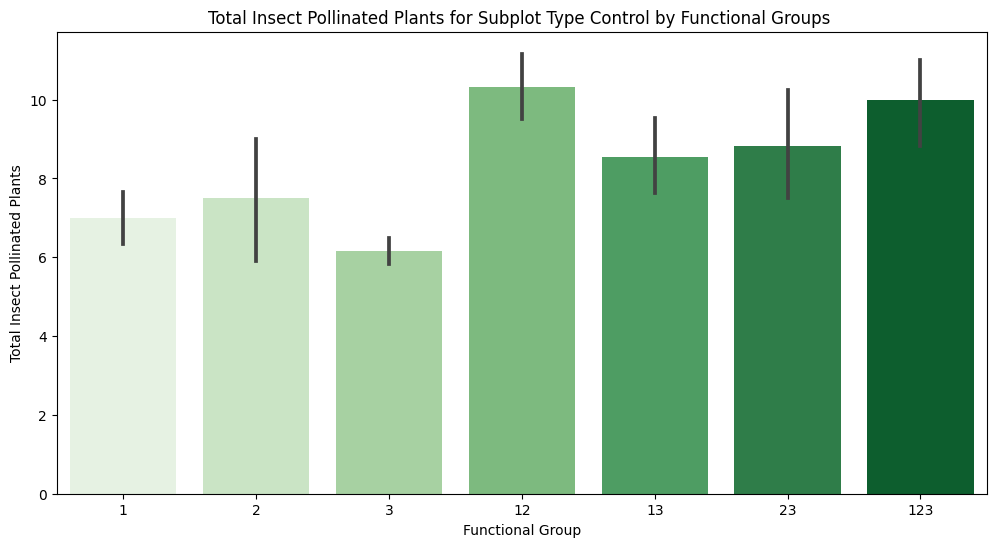

In [21]:
# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x='FG', y='InsectPollinatedPlants', data=subset_c, palette='Greens')

#Labels and title
plt.xlabel('Functional Group')
plt.ylabel('Total Insect Pollinated Plants')
plt.title('Total Insect Pollinated Plants for Subplot Type Control by Functional Groups ')

# Show the plot
plt.show()

Columns for FG3 and FG2&3 are the tallest for number of floral units. This is not reflected in the bar plot showing the number of insect pollinated plants by functional group.

It does not look like pollination increased flower production in this instance. I will double check this by check if there a relationship between the number of floral units and the number of insect pollinated plants with a scatterplot.

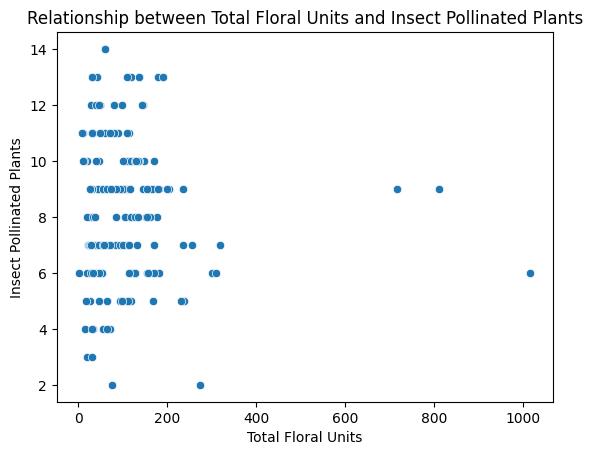

In [22]:
sns.scatterplot(x='TotalFloralUnits', y='InsectPollinatedPlants', data=df1Floral)

plt.xlabel('Total Floral Units')
plt.ylabel('Insect Pollinated Plants')
plt.title('Relationship between Total Floral Units and Insect Pollinated Plants')
plt.show()


From the scatterplot, it does not look like there is a linear relationship between the two. The linear regression line is confused by the three outliers. Next, I wanted to visualise this scatter plot for all functional groups to check trends.

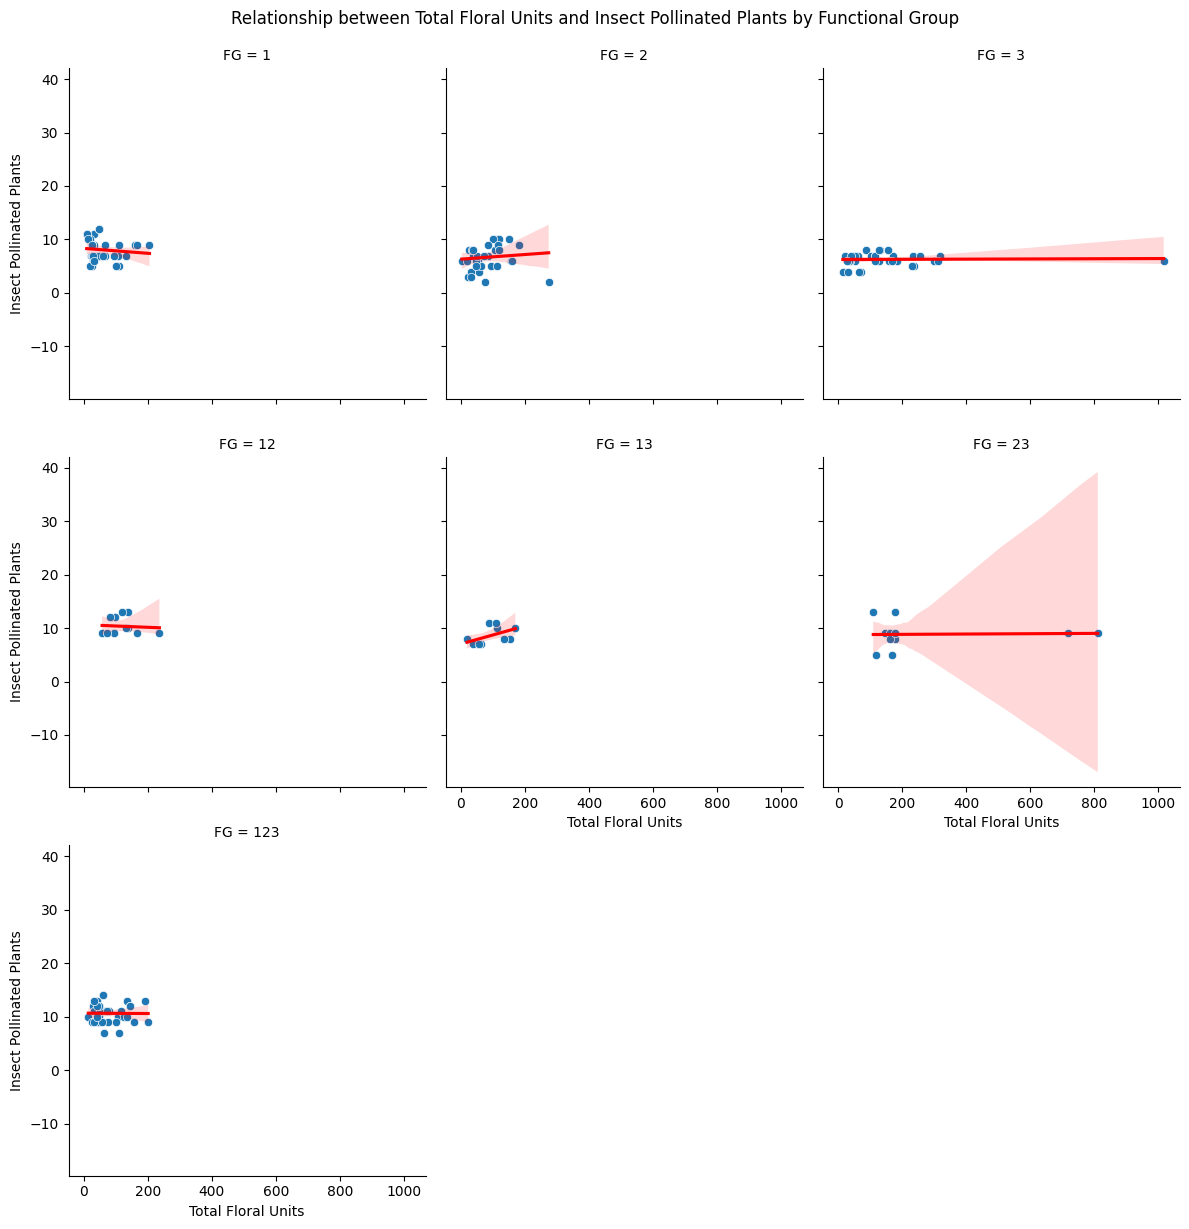

In [23]:
# multiple scatter plots
g = sns.FacetGrid(df1Floral, col="FG", col_wrap=3, height=4)
g.map(sns.scatterplot, 'TotalFloralUnits', 'InsectPollinatedPlants')
g.map(sns.regplot, 'TotalFloralUnits', 'InsectPollinatedPlants', scatter=False, color='red')

# Add labels and title
g.set_axis_labels('Total Floral Units', 'Insect Pollinated Plants')
g.fig.suptitle('Relationship between Total Floral Units and Insect Pollinated Plants by Functional Group', y=1.02)

plt.show()


Again, some of the regression lines are skewed because of outliers. Still, I want to check if this is statistically significant.

In [24]:
#Correlation
correlation_by_fg = df1Floral.groupby('FG').apply(lambda group: group['TotalFloralUnits'].corr(group['InsectPollinatedPlants']))
print("Correlation Coefficients by Functional Group:")
print(correlation_by_fg)

Correlation Coefficients by Functional Group:
FG
1     -0.109313
2      0.109003
3      0.027797
12    -0.070794
13     0.508742
23     0.029429
123   -0.008589
dtype: float64


Negative coefficients (e.g., FG 1 and FG 12) suggest a negative correlation.
Positive coefficients (e.g., FG 2, FG 3, FG 23) suggest a positive correlation, FG13 suggests a strong positive correlation. This would mean that as TotalFloralUnits increases, InsectPollinatedPlants also tends to increase significantly in that functional group.
The dataset is too small in this instance to draw certain conclusions on the relationship between pollinator visit and floral units.

2. Next, I want to check whether there is any difference in floral units by location. The plots are distributed over six rows, row one being the top of the slope and row 6 being the bottom of the slope. Does this affect floral units?

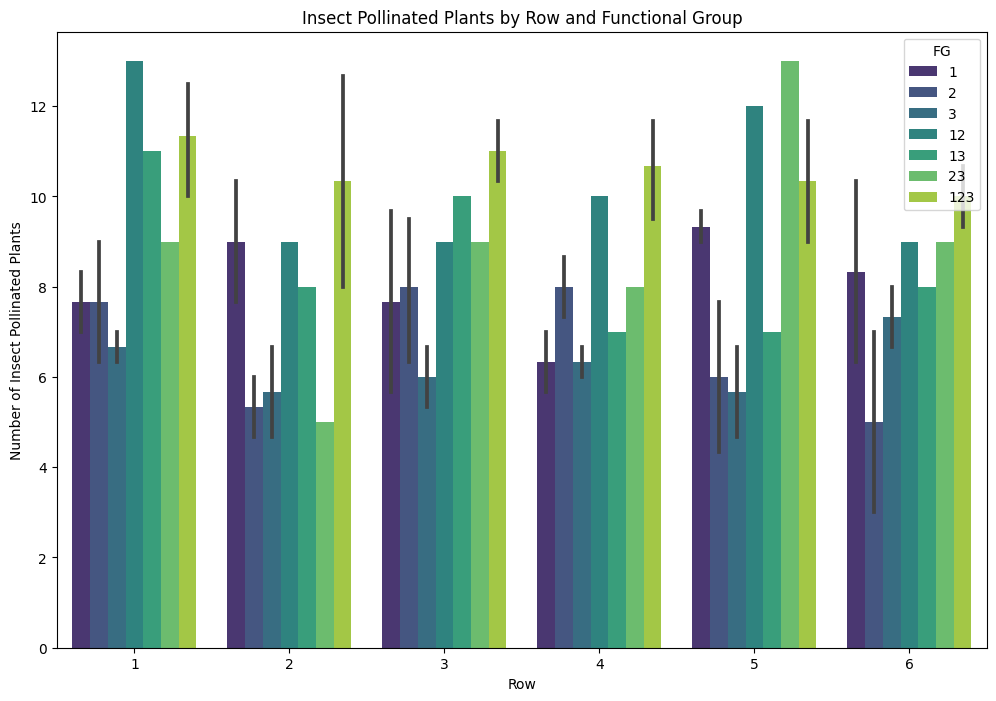

In [25]:
plt.figure(figsize=(12, 8))
sns.barplot(x='Row', y='InsectPollinatedPlants', hue='FG', data=df1Floral, palette='viridis')

# Add labels and title
plt.xlabel('Row')
plt.ylabel('Number of Insect Pollinated Plants')
plt.title('Insect Pollinated Plants by Row and Functional Group')

# Show the plot
plt.show()


Visually, it does not look like there is a significant change in number of insect pollinated plants between the six rows. Next, I will compare only row 1 and row 6, merging the number of insect pollinated plants for all Functional groups on that row.

In [26]:
# Sum 'InsectPollinatedPlants' for Row1
sum_1 = df1Floral[df1Floral['Row'] == 1].groupby('Row')['InsectPollinatedPlants'].sum().reset_index()

#Sum 'InsectPollinatedPlants' for Row6
sum_6 = df1Floral[df1Floral['Row'] == 6].groupby('Row')['InsectPollinatedPlants'].sum().reset_index()

print("The sum of Insect Pollinated Plants for Row 1 is:"), print(sum_1)
print("The sum of Insect Pollinated Plants for Row 6 is"), print(sum_6)

The sum of Insect Pollinated Plants for Row 1 is:
   Row  InsectPollinatedPlants
0    1                     266
The sum of Insect Pollinated Plants for Row 6 is
   Row  InsectPollinatedPlants
0    6                     236


(None, None)

In [27]:
# 'InsectPollinatedPlants' for Row 1 and Row 6
insect_pollinated_plants_row1 = df1Floral[df1Floral['Row'] == 1]['InsectPollinatedPlants']
insect_pollinated_plants_row6 = df1Floral[df1Floral['Row'] == 6]['InsectPollinatedPlants']

# Perform independent two-sample t-test
t_stat, p_value = ttest_ind(insect_pollinated_plants_row1, insect_pollinated_plants_row6, equal_var=False)

# Display the results
print(f'T-statistic: {t_stat}')
print(f'P-value: {p_value}')

# Interpret the results
if p_value < 0.05:
    print('The difference in Insect Pollinated Plants between Row 1 and Row 6 is statistically significant.')
else:
    print('There is no significant difference in Insect Pollinated Plants between Row 1 and Row 6.')


T-statistic: 1.6021474573884795
P-value: 0.11455662430869427
There is no significant difference in Insect Pollinated Plants between Row 1 and Row 6.


The difference between row 1 (top of the slope) and row 6 (bottom of the slope) is of 30 insect pollinated plants. It is not statistically significant. I also want to check whether the number of floral units changes drastically between the two.

Does the number of floral units change between rows?

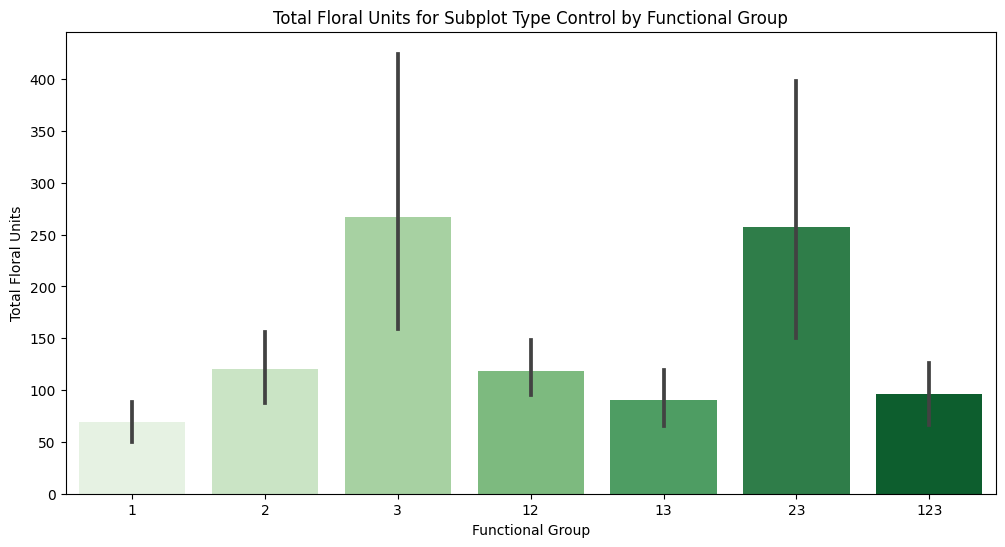

In [28]:
# Select only rows where 'Subplot_Type' is 'Control'
subset_c = df1Floral[df1Floral['Subplot_Type'] == 'C']

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x='FG', y='TotalFloralUnits', data=subset_c, palette= 'Greens')

# Add labels and title
plt.xlabel('Functional Group')
plt.ylabel('Total Floral Units')
plt.title ('Total Floral Units for Subplot Type Control by Functional Group')

# Show the plot
plt.show()

In [29]:
# Sum 'Floral units' for Row1
sum_1 = df1Floral[df1Floral['Row'] == 1].groupby('Row')['TotalFloralUnits'].sum().reset_index()

#Sum 'Floral units' for Row6
sum_6 = df1Floral[df1Floral['Row'] == 6].groupby('Row')['TotalFloralUnits'].sum().reset_index()

print("The sum of floral units for Row 1 is:")
print(sum_1)
print("The sum of floral units for Row 6 is")
print(sum_6)

The sum of floral units for Row 1 is:
   Row  TotalFloralUnits
0    1              3624
The sum of floral units for Row 6 is
   Row  TotalFloralUnits
0    6              3892


In [30]:
#'TotalFloralUnits' for Row 1 and Row 6
floral_units_row1 = df1Floral[df1Floral['Row'] == 1]['TotalFloralUnits']
floral_units_row6 = df1Floral[df1Floral['Row'] == 6]['TotalFloralUnits']

# Perform independent two-sample t-test
t_stat, p_value = ttest_ind(floral_units_row1, floral_units_row6, equal_var=False)

# Display the results
print(f'T-statistic: {t_stat}')
print(f'P-value: {p_value}')

# Interpret the results
if p_value < 0.05:
    print('The difference in floral units between Row 1 and Row 6 is statistically significant.')
else:
    print('There is no significant difference in floral units between Row 1 and Row 6.')


T-statistic: -0.2538809414589619
P-value: 0.8009876412641019
There is no significant difference in floral units between Row 1 and Row 6.


In the case of floral units, row 6 (bottom of slope) has more floral units. In the case of insect pollinated plants, row 1 (top of slope) has more. The location of the plot does not seem to have a strong influence on the number of floral units nor insect pollinated plants. Whilst statistically the difference between the two is not significant, more data would be needed to correctly assess whether location does make a difference. In this case, all floral units and all insect pollinated plants are summed, regardless of functional group. This can lead to error.

Part II on Floral surveys investigated aspects of the plant communities.
Firstly, it was determined that there is a statistically significant difference in the number of floral units between plant communities under the different subplot types, even under Control conditions. To better understand the reasons, I examined whether pollination visit and the location of the plot contribute to this difference. Neither pollination visit nor location seem to explain statistically an increase in flower unit production.
This section also assessed the effect of the drought condition across the different functional groups (FG). The analysis identified a statistically significant difference.

# Part III. Pollinator Surveys


This dataset records the number of insect visit and the type of pollinator for each plant species.

I start by looking at the data, selecting the columns to analyse and renaming them for consistency with the other Excel sheets.

In [31]:
df3Poll.head()

,Row,Plot_ID,FG,FG_Diversity,Date_Surveyed,Subplot_Type,SubplotID,Survey_Number,SurveyID,TaxonomicID,Pollinator_Species_Code,Plant_Species,No_Visits
0,1,1,2,1,24-Jul-16,C,1.C,2,1.C.2,Diptera,Diptera_med,Crepis_capillaris,5.0
1,1,1,2,1,27-Jul-16,D,1.D,2,1.D.2,Diptera,Diptera_med,Daucus_carota,1.0
2,1,1,2,1,21-Jul-16,C,1.C,2,1.C.2,Diptera,Diptera_minute,Lathyrus_pratensis,1.0
3,1,1,2,1,22-Jul-16,C,1.C,2,1.C.2,Nitidulidae,Pollen_Beetle,Crepis_capillaris,19.0
4,1,1,2,1,23-Jul-16,C,1.C,2,1.C.2,Nitidulidae,Pollen_Beetle,Lathyrus_pratensis,2.0


In [32]:
#Select columns from df3Poll
selected_columns1 = df3Poll[['Row', 'Plot_ID','Subplot_Type','SubplotID','Pollinator_Species_Code','Plant_Species', 'No_Visits']]

In [33]:
df3Poll = df3Poll[['Row', 'Plot_ID','Subplot_Type','SubplotID','Pollinator_Species_Code','Plant_Species', 'No_Visits']]

In [34]:
# rename columns
df3Poll.rename(columns={'Pollinator_Species_Code':'PollinatorSpecies'}, inplace=True)
df3Poll.rename(columns={'Plot_ID':'PlotID'}, inplace=True)
df3Poll.rename(columns={'Subplot_Type':'SubplotType'}, inplace=True)
df3Poll.rename(columns={'Plant_Species':'PlantSpecies'}, inplace=True)
df3Poll.rename(columns={'No_Visits':'NumberVisits'}, inplace=True)

<ipython-input-34-62d3e181ba99>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3Poll.rename(columns={'Pollinator_Species_Code':'PollinatorSpecies'}, inplace=True)
<ipython-input-34-62d3e181ba99>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3Poll.rename(columns={'Plot_ID':'PlotID'}, inplace=True)
<ipython-input-34-62d3e181ba99>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3Poll.rename(columns={'Subplot_Type':'SubplotType

In [35]:
#check
print(df3Poll)

     Row  PlotID SubplotType SubplotID     PollinatorSpecies  \
0      1       1           C       1.C           Diptera_med   
1      1       1           D       1.D           Diptera_med   
2      1       1           C       1.C        Diptera_minute   
3      1       1           C       1.C         Pollen_Beetle   
4      1       1           C       1.C         Pollen_Beetle   
..   ...     ...         ...       ...                   ...   
475    6      42           C      42.C  Parastic_Wasp_minute   
476    6      42           C      42.C  Parastic_Wasp_minute   
477    6      42           C      42.C  Parastic_Wasp_minute   
478    6      42           C      42.C  Parastic_Wasp_minute   
479    6      42           C      42.C         Pollen_Beetle   

              PlantSpecies  NumberVisits  
0        Crepis_capillaris           5.0  
1            Daucus_carota           1.0  
2       Lathyrus_pratensis           1.0  
3        Crepis_capillaris          19.0  
4       Lathyrus

In [36]:
# Drop missing values
df3Poll.dropna(inplace=True)
print(df3Poll)

     Row  PlotID SubplotType SubplotID     PollinatorSpecies  \
0      1       1           C       1.C           Diptera_med   
1      1       1           D       1.D           Diptera_med   
2      1       1           C       1.C        Diptera_minute   
3      1       1           C       1.C         Pollen_Beetle   
4      1       1           C       1.C         Pollen_Beetle   
..   ...     ...         ...       ...                   ...   
475    6      42           C      42.C  Parastic_Wasp_minute   
476    6      42           C      42.C  Parastic_Wasp_minute   
477    6      42           C      42.C  Parastic_Wasp_minute   
478    6      42           C      42.C  Parastic_Wasp_minute   
479    6      42           C      42.C         Pollen_Beetle   

              PlantSpecies  NumberVisits  
0        Crepis_capillaris           5.0  
1            Daucus_carota           1.0  
2       Lathyrus_pratensis           1.0  
3        Crepis_capillaris          19.0  
4       Lathyrus

<ipython-input-36-0393aa97878c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3Poll.dropna(inplace=True)


To start understanding the data, I want to list and count the number of plant species in the "Plant Species column"

In [37]:
#Plant Species count
species_count1 = df3Poll['PlantSpecies'].nunique()
print("The number of plant species is:", species_count1)

The number of plant species is: 26


In [38]:
#Plant Species types list
species_list1 = df3Poll['PlantSpecies'].unique()
print("The list of plant species is:", species_list1)

The list of plant species is: ['Crepis_capillaris' 'Daucus_carota' 'Lathyrus_pratensis'
 'Onobrychis_viciifolia' 'Vicia_cracca' 'Leucanthemum_vulgare'
 'Prunella_vulgaris' 'Lotus_corniculatus' 'Trifolium_pratense'
 'Leontodon_hispidus' 'Clinopodium_vulgare' 'Trifolium_repens'
 'Galium_verum' 'Hypochaeris_radicata' 'Rhianthus_minor'
 'Achillea_millefolium' 'Centaurea_nigra' 'Galium_mollugo'
 'Scabiosa_columbaria' 'Sonchus_oleraceus' 'Potentilla_reptans'
 'Ranunculus_repens' 'Cerastium_fontanum' 'Bellis_perennis'
 'Centurea_scabiosa' 'Pilosella_aurantiaca']


Next I want to know which of the 26 plant species listed is most abundant i.e. most repeated in the column.

In [39]:
#Check which plant species is most abundant
most_abundant_plant = df3Poll['PlantSpecies'].value_counts()
print("The most abundant plant is:", most_abundant_plant)

The most abundant plant is: Daucus_carota            167
Crepis_capillaris         73
Leucanthemum_vulgare      54
Onobrychis_viciifolia     50
Leontodon_hispidus        28
Hypochaeris_radicata      16
Lotus_corniculatus        11
Prunella_vulgaris         10
Galium_mollugo             9
Sonchus_oleraceus          8
Lathyrus_pratensis         7
Centaurea_nigra            6
Trifolium_repens           6
Scabiosa_columbaria        5
Ranunculus_repens          5
Achillea_millefolium       4
Clinopodium_vulgare        4
Vicia_cracca               4
Galium_verum               3
Trifolium_pratense         2
Potentilla_reptans         2
Rhianthus_minor            1
Cerastium_fontanum         1
Bellis_perennis            1
Centurea_scabiosa          1
Pilosella_aurantiaca       1
Name: PlantSpecies, dtype: int64


I have listed the species and found that Daucus_carota is the most common plant species in my dataset. Next, I want to repeat the analysis for the pollinators to describe the type of data in the Pollinator Species column.

To better understand the data, I start by counting the number and list the types of pollinator species classes.



In [40]:
#Pollinator Species count
species_count = df3Poll['PollinatorSpecies'].nunique()
print("The number of pollinator species is:", species_count)

The number of pollinator species is: 42


In [41]:
#Pollinator Species types list
species_list = df3Poll['PollinatorSpecies'].unique()
print("The list of pollinator species is:", species_list)

The list of pollinator species is: ['Diptera_med' 'Diptera_minute' 'Pollen_Beetle' 'SolBee_lrg'
 'Syrphid_med_blackshiny' 'Apis_melifera' 'Bombus_lap' 'Eristalis_lrg'
 'Heteroptera' 'Sarcoph' 'Syrphid_med_shiny_yb' 'Thrip' 'Diptera_small'
 'Eristalis_med' 'Sepsidae' 'SolBee_small' 'Syrphid' 'Syrphid_med'
 'Syrphid_med_yb' 'Oedemera_nobilis' 'Parastic_Wasp_minute'
 'Scathophagidae' 'SolBee_med' 'Stratiomyidae' 'Syrphid_small_metallic'
 'Empid' 'Heteroptera_med' 'Lepidoptera' 'Opiliones' 'Heteroptera_small'
 'Syrphid_small_yb' 'Muscidae' 'Pyrochroa' 'Eristalis' 'Chrysopidae'
 'Heteroptera_lrg' 'Linyphiidae' 'Syrphid_small' 'Calliphoridae'
 'Cercopoidea' 'Parasitic_Wasp_lrg' 'Syrphid_lrg']


The number of pollinator species is 42. Out of the ones listed, which pollinator species is most abundant in my dataset?

In [42]:
#Check which pollinator species is most abundant
most_abundant_poll = df3Poll['PollinatorSpecies'].value_counts()
print("The most abundant pollinator is:", most_abundant_poll)

The most abundant pollinator is: Pollen_Beetle             66
Diptera_med               65
Bombus_lap                41
Parastic_Wasp_minute      28
Diptera_small             23
Eristalis_med             21
Eristalis                 20
Syrphid_small_yb          20
Diptera_minute            19
Syrphid_med_yb            17
Syrphid_med_blackshiny    17
Oedemera_nobilis          14
SolBee_small              12
Heteroptera               11
Syrphid_small             10
Syrphid_small_metallic     9
Heteroptera_small          8
Apis_melifera              8
Syrphid_med                8
Heteroptera_med            7
Sarcoph                    6
Sepsidae                   6
Syrphid_med_shiny_yb       5
Heteroptera_lrg            5
Syrphid                    4
Empid                      4
Eristalis_lrg              3
Thrip                      3
Cercopoidea                3
Scathophagidae             2
Lepidoptera                2
Stratiomyidae              2
Opiliones                  1
Muscidae  

The pollinator species most abundant in my dataset is the Pollen Beetle which is found 66 times in the column, followed by Diptera. I will now visualise the data with a barplot.

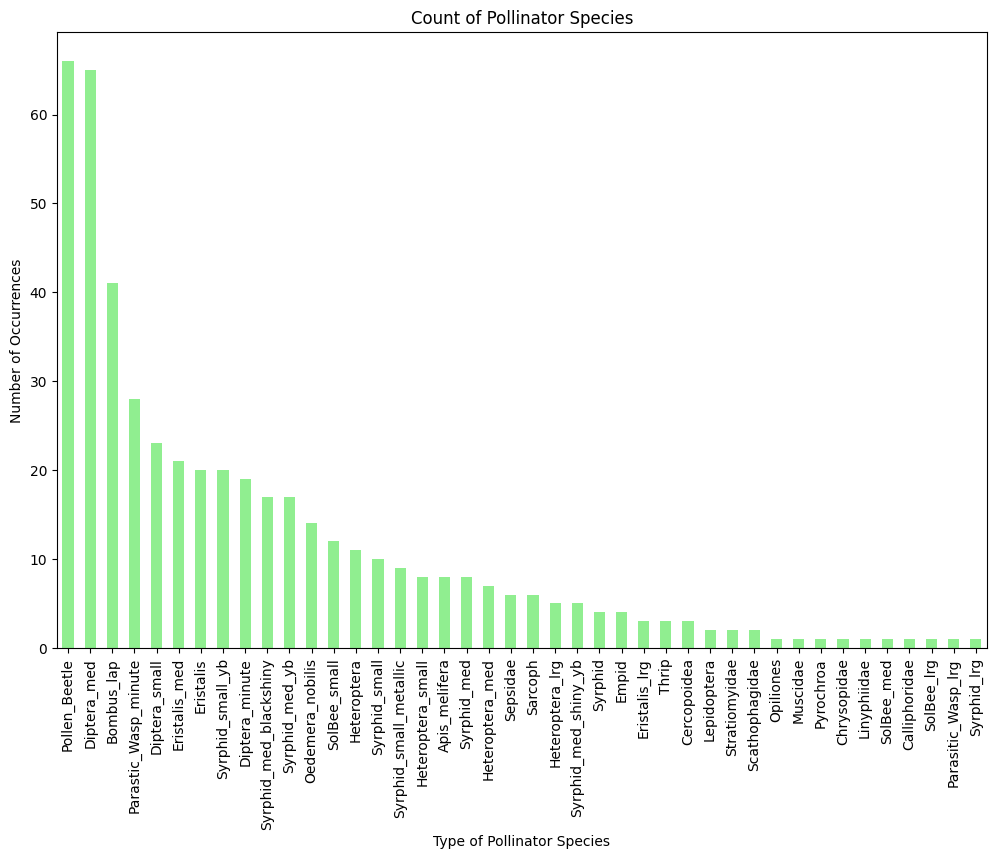

In [43]:
#Visualise the results
plt.figure(figsize=(12, 8))
most_abundant_poll.sort_values(ascending=False).plot(kind='bar', color='lightgreen')
plt.title('Count of Pollinator Species')
plt.xlabel('Type of Pollinator Species')
plt.ylabel('Number of Occurrences')
plt.show()

Each bar represents a pollinator species, and the height of the bar corresponds to the number of occurrences of that species. This visually shows that the Pollen Beetle is the reoccurring pollinator.

Next, I want to check which of the plant species received the most pollinator visits.

In [44]:
# Calculate pollinator visits for each plant species
pollinator_visits = df3Poll.groupby('PlantSpecies')['NumberVisits'].sum()
print("The plant species that received the most pollinator visits is:", pollinator_visits)

The plant species that received the most pollinator visits is: PlantSpecies
Achillea_millefolium       0.0
Bellis_perennis            1.0
Centaurea_nigra           15.0
Centurea_scabiosa          1.0
Cerastium_fontanum         1.0
Clinopodium_vulgare        5.0
Crepis_capillaris        274.0
Daucus_carota            389.0
Galium_mollugo            18.0
Galium_verum               4.0
Hypochaeris_radicata      21.0
Lathyrus_pratensis         8.0
Leontodon_hispidus        41.0
Leucanthemum_vulgare      99.0
Lotus_corniculatus        12.0
Onobrychis_viciifolia    251.0
Pilosella_aurantiaca       1.0
Potentilla_reptans         2.0
Prunella_vulgaris         22.0
Ranunculus_repens         11.0
Rhianthus_minor            1.0
Scabiosa_columbaria        5.0
Sonchus_oleraceus         21.0
Trifolium_pratense         2.0
Trifolium_repens           6.0
Vicia_cracca              11.0
Name: NumberVisits, dtype: float64


This list is not very informative, I will now visualise it to see which of the plant species received the most pollinator visit.

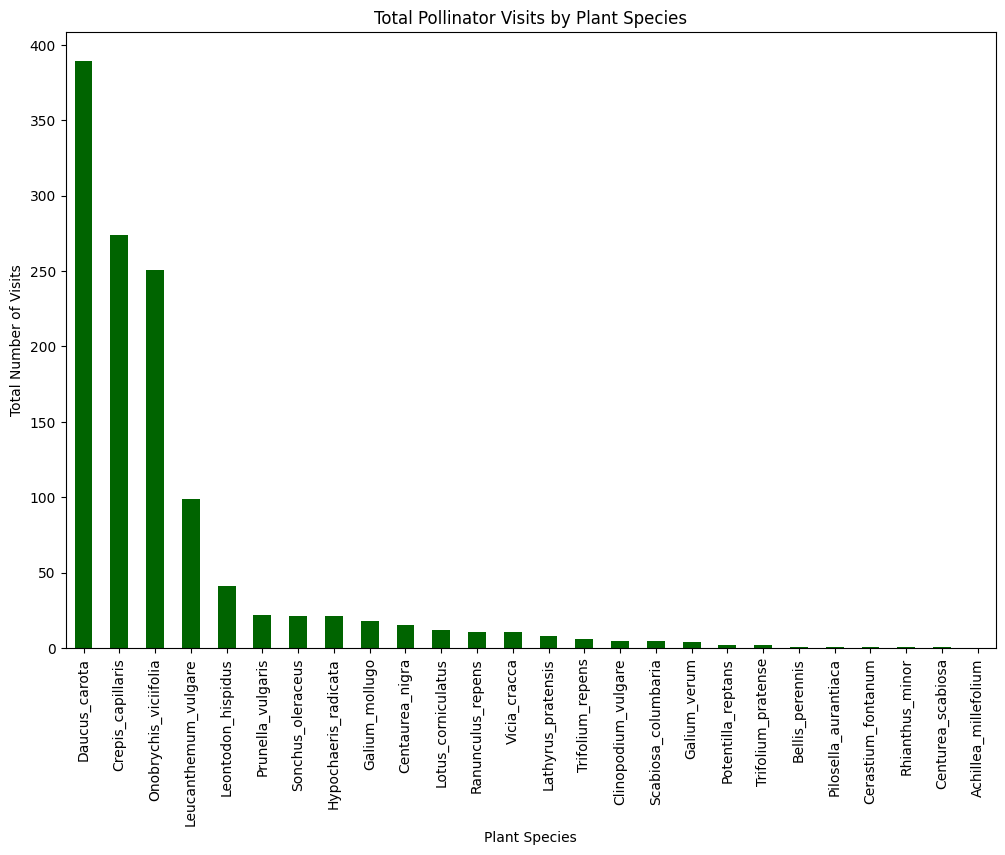

In [45]:
# Plot the results
plt.figure(figsize=(12, 8))
pollinator_visits.sort_values(ascending=False).plot(kind='bar', color='darkgreen')
plt.title('Total Pollinator Visits by Plant Species')
plt.xlabel('Plant Species')
plt.ylabel('Total Number of Visits')
plt.show()

 Daucus_carota attracts by far the highest number of pollinator species, but it is also the most abundant plant. For this reason I want to investigate the correlation between plant species and the number of pollinator visits with the Kruskal-Wallis test which assesses whether there are statistically significant differences between the plant species. Kruskal-Wallis test is more appropriate when the data is nor normally distributed and I have more than two independent groups (plant species).

In [46]:
# Kruskal-Wallis test
statistic, p_value = kruskal(*[group['NumberVisits'] for name, group in df3Poll.groupby('PlantSpecies')])

# Print
print(f"Kruskal-Wallis Statistic: {statistic}")
print(f"P-value: {p_value}")

# Interpret
if p_value < 0.05:
    print("There is a significant difference in the number of visits among plant species.")
else:
    print("There is no significant difference in the number of visits among plant species.")

Kruskal-Wallis Statistic: 69.59270133017966
P-value: 4.422223564174721e-06
There is a significant difference in the number of visits among plant species.


The Kruskal-Wallis test confirms that there is a statistically significant difference.
To better understand the data, I want to understand if pollinators have a preference by assessing which pollinator is more likely to visit which plant.

In [47]:
#Group pollinators
pollinator_preferences = df3Poll.groupby('PollinatorSpecies')['PlantSpecies'].unique()

print("Pollinator preferences:")
for pollinator, preferred_plants in pollinator_preferences.items():
    print(f"{pollinator} prefers: {', '.join(preferred_plants)}")

Pollinator preferences:
Apis_melifera prefers: Onobrychis_viciifolia, Achillea_millefolium
Bombus_lap prefers: Onobrychis_viciifolia, Vicia_cracca, Trifolium_pratense, Lotus_corniculatus, Crepis_capillaris, Centaurea_nigra, Scabiosa_columbaria, Centurea_scabiosa, Prunella_vulgaris, Daucus_carota
Calliphoridae prefers: Daucus_carota
Cercopoidea prefers: Daucus_carota, Crepis_capillaris
Chrysopidae prefers: Onobrychis_viciifolia
Diptera_med prefers: Crepis_capillaris, Daucus_carota, Leontodon_hispidus, Hypochaeris_radicata, Galium_mollugo, Leucanthemum_vulgare, Sonchus_oleraceus, Centaurea_nigra, Galium_verum, Ranunculus_repens, Prunella_vulgaris, Onobrychis_viciifolia
Diptera_minute prefers: Lathyrus_pratensis, Daucus_carota, Leucanthemum_vulgare, Cerastium_fontanum, Crepis_capillaris, Galium_verum
Diptera_small prefers: Daucus_carota, Leontodon_hispidus, Rhianthus_minor, Hypochaeris_radicata, Potentilla_reptans, Sonchus_oleraceus, Galium_mollugo, Leucanthemum_vulgare, Crepis_capillaris

The list shows me which pollinator visits which plant. Whilst this is not enough to say with certainty that a pollinator, given the choice, would prefer a plant over another, it can help shows trends. Next, I will attempt to create a matrix and a visual heat map to show pollinator preferences.

In [48]:
# Create a binary matrix indicating whether each pollinator prefers each plant species
binary_matrix = pd.crosstab(df3Poll['PollinatorSpecies'], df3Poll['PlantSpecies']).applymap(lambda x: 1 if x > 0 else 0)
print(binary_matrix)

PlantSpecies            Achillea_millefolium  Bellis_perennis  \
PollinatorSpecies                                               
Apis_melifera                              1                0   
Bombus_lap                                 0                0   
Calliphoridae                              0                0   
Cercopoidea                                0                0   
Chrysopidae                                0                0   
Diptera_med                                0                0   
Diptera_minute                             0                0   
Diptera_small                              0                0   
Empid                                      0                0   
Eristalis                                  0                0   
Eristalis_lrg                              0                0   
Eristalis_med                              0                0   
Heteroptera                                0                0   
Heteroptera_lrg          

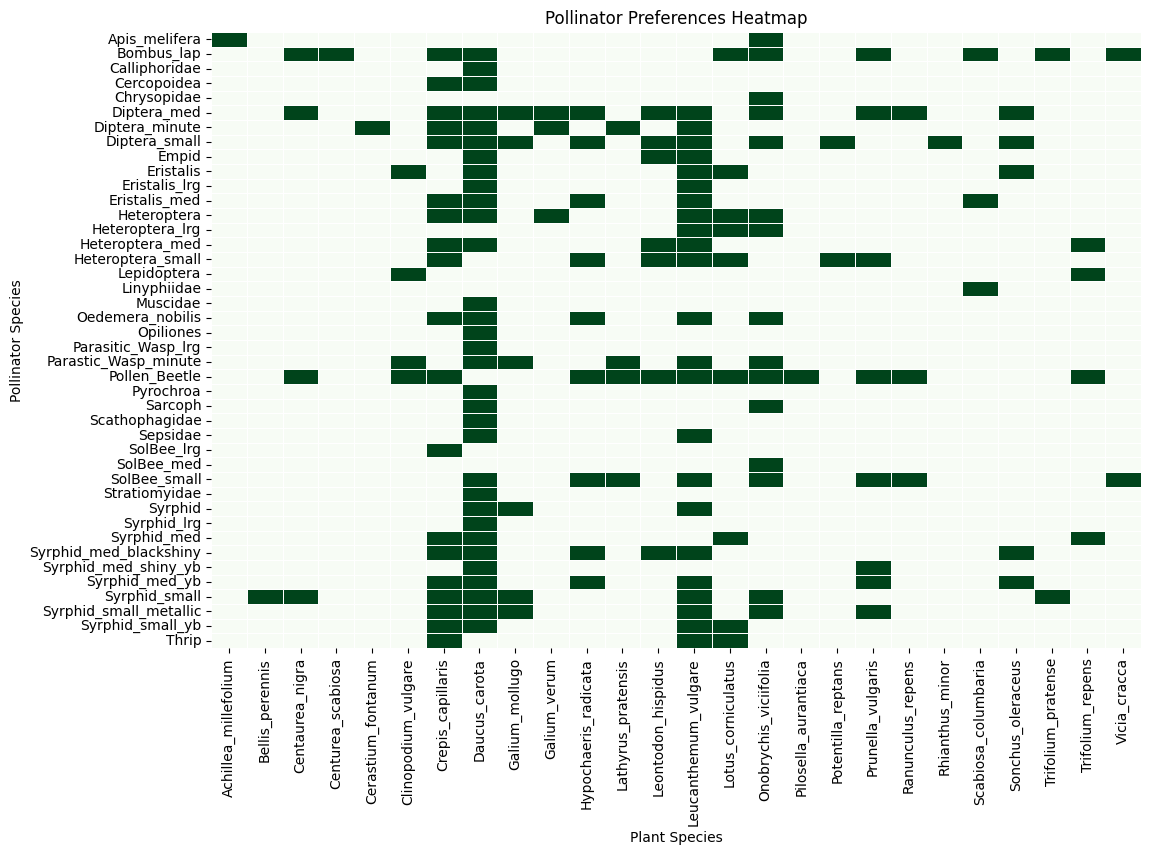

In [49]:
# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(binary_matrix, cmap="Greens", cbar=False, annot=False, fmt="d", linewidths=.5)
plt.title('Pollinator Preferences Heatmap')
plt.xlabel('Plant Species')
plt.ylabel('Pollinator Species')
plt.show()

This heatmap shows the preference of each pollinator species for each plant species. The dark green squares indicate a preference, while white squares indicate no preference. Although difficult to achieve,this could be repeated with the same number of pollinator visit for each plant, to correctly assess which pollinator is most abundant in each.

**Location and Pollinator Visits**

As mentioned in previous sections, the plots are 42 and divided over six rows. As shown in the diagram, row 1 is the top of the slope and row 6 is the bottom of the slope. I want to use local regression to assess whether the number of pollinator visits changes according to location (column PlotID). Are there differences in the average number of visits across different rows?


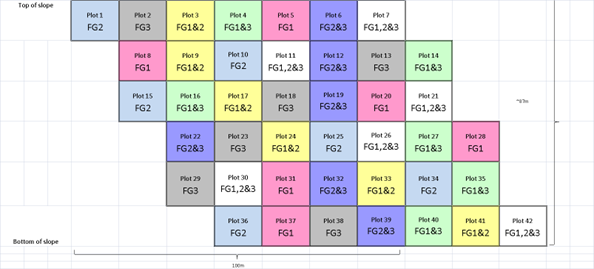

To start exploring the data,  I want each range (1-7) of plots to be grouped into the six rows. I group all plots in a row regardless of their functional group types (each row has each of the seven functional groups).

In [50]:
#Group PlotID by row number (1-6)
df3Poll['Rowv1'] = (df3Poll['PlotID'] - 1) // 7 + 1

# Check if it worked
print(df3Poll['Rowv1'].unique())
print(df3Poll[['Rowv1', 'PlotID', 'NumberVisits']])

[1 2 3 4 5 6]
     Rowv1  PlotID  NumberVisits
0        1       1           5.0
1        1       1           1.0
2        1       1           1.0
3        1       1          19.0
4        1       1           2.0
..     ...     ...           ...
475      6      42          18.0
476      6      42           1.0
477      6      42           1.0
478      6      42           2.0
479      6      42           1.0

[479 rows x 3 columns]


I have now divided my plots into six rows. Next, I calculate the mean and standard deviation of the number of visits for each of the six rows.

In [51]:
# Calculate the mean and standard deviation number of visits for each row
stats_by_row = df3Poll.groupby('Rowv1')['NumberVisits'].agg(['mean', 'std']).reset_index()
print(stats_by_row)

   Rowv1      mean       std
0      1  3.652174  4.752170
1      2  1.817073  1.757721
2      3  3.369231  6.318547
3      4  2.217822  2.583037
4      5  1.936709  2.046522
5      6  2.710843  4.402134


I found for each row the mean and std of number of pollinator visits. I now want to apply local regression as the relationship between variables may change across different geographical areas, this should help me understand if there is a spatial pattern between the rows.
I apply LOWESS (LOcally wEighted Scatterplot Smoothing) which is non parametric, normalises the data and fits a smooth curve to the scatterplots.

/usr/local/lib/python3.10/dist-packages/statsmodels/nonparametric/smoothers_lowess.py:227: RuntimeWarning: invalid value encountered in divide
  res, _ = _lowess(y, x, x, np.ones_like(x),


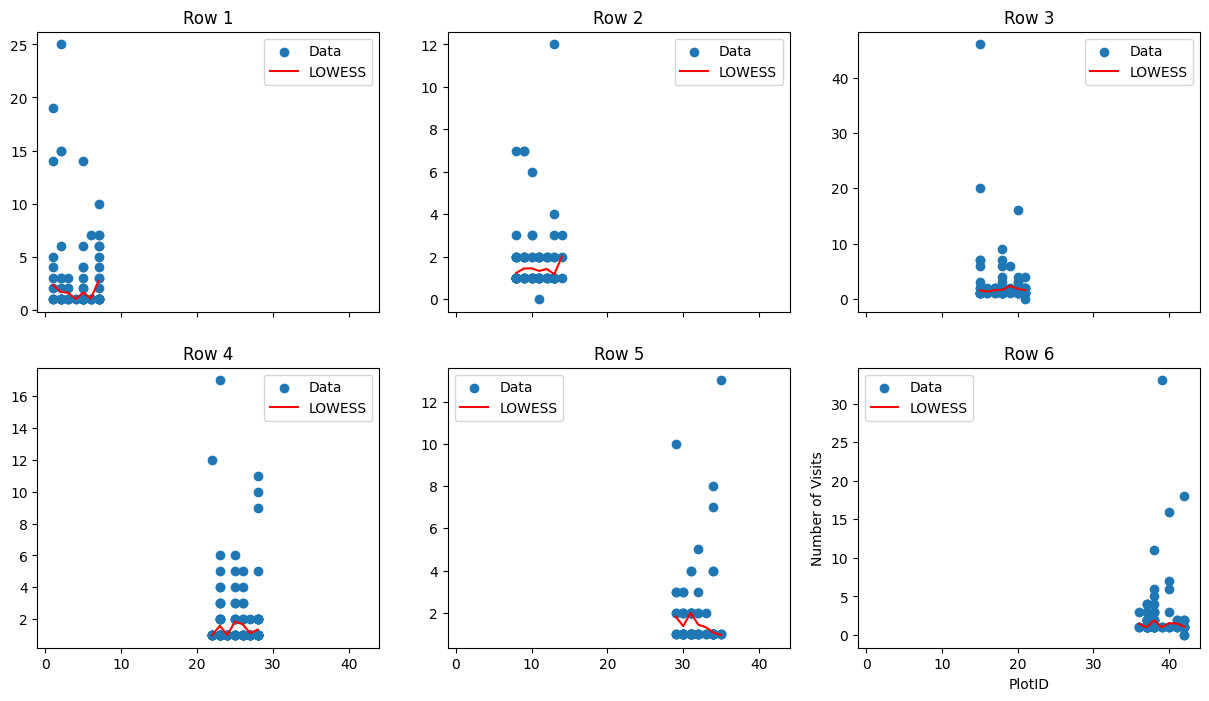

In [52]:
# Apply local regression to each of my 6 rows

fig, axs = plt.subplots(2, 3, figsize=(15, 8), sharex=True)
for i, (row, group) in enumerate(df3Poll.groupby('Row')):
    ax = axs[i // 3, i % 3]
    lowess = sm.nonparametric.lowess(group['NumberVisits'], group['PlotID'], frac=0.3)
    ax.scatter(group['PlotID'], group['NumberVisits'], label='Data')
    ax.plot(lowess[:, 0], lowess[:, 1], 'r', label='LOWESS')
    ax.set_title(f'Row {row}')
    ax.legend()

plt.xlabel('PlotID')
plt.ylabel('Number of Visits')
plt.show()

The scatter points represent my original data points. I want to check whether there is a significant difference in the number of visits according to location of the row. Are pollinators more likely to visit the top of the slope,the bottom of the slope or there is no significant difference?

Since the number of visits may not follow a normal distribution, a non-parametric test like the Kruskal-Wallis test is more suitable than ANOVA.

In [53]:
grouped_data = [df3Poll['NumberVisits'][df3Poll['Rowv1'] == row] for row in range(1, 7)]

# Perform Kruskal-Wallis test
h_statistic, p_value = kruskal(*grouped_data)

print("Kruskal-Wallis H-statistic:", h_statistic)
print("P-value:", p_value)

# Interpret the results
if p_value < 0.05:
    print('There is evidence that the difference in the mean number of visits between rows is significant')
else:
    print('There is no significant difference.')

Kruskal-Wallis H-statistic: 10.950804221477208
P-value: 0.0523641628571563
There is no significant difference.


There is no significant difference in the mean number of visits between the rows. This suggests that there is no difference on pollination visits whether a plot is at the top or at the bottom of the slope.

To double check the results from my local regression, I also apply linear regression to my data. For my linear regression, the number of pollinator visits in my dependent variable and my independent variable is the number of row. Both are numerical values, therefore don't need encoding.


In [54]:
X = df3Poll[['Row']]  # Independent variable
y = df3Poll['NumberVisits']  # Dependent variable

# Add constant term
X = sm.add_constant(X)

# Fit the linear regression model
model = sm.OLS(y, X).fit()

# Print the model summary
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:           NumberVisits   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.660
Date:                Thu, 16 Nov 2023   Prob (F-statistic):              0.198
Time:                        21:55:46   Log-Likelihood:                -1325.9
No. Observations:                 479   AIC:                             2656.
Df Residuals:                     477   BIC:                             2664.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.0390      0.418      7.274      0.0

The p-value is 0.198 (Prob (F-statistic)), suggesting that the model as a whole is not statistically significant.

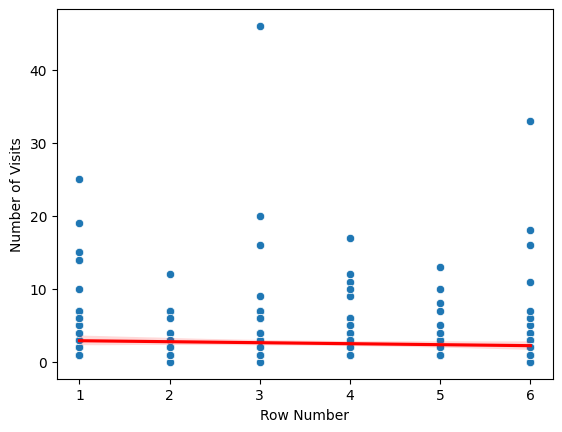

In [55]:
#Plot
sns.scatterplot(x='Row', y='NumberVisits', data=df3Poll)

# add line
sns.regplot(x='Row', y='NumberVisits', data=df3Poll, scatter=False, color='red')

# Set plot labels
plt.xlabel('Row Number')
plt.ylabel('Number of Visits')

# Show the plot
plt.show()

This is also apparent from the plot. The linear regression line is flat - there might not be a linear relationship between the number of pollinator visits and the row number (1-6), the data points are clustered with low variability, inability to predict. There is not enough evidence to conclude that 'Row' has a statistically significant effect on 'NumberVisits' with this regression model.

**Subplot Type and Pollinator Visits**


Next, I want to check if the type of subplot (Control, Roofed or Drought) is related to the number of pollinator visits. I start by visualising it with a scatterplot followed by statistical analysis.

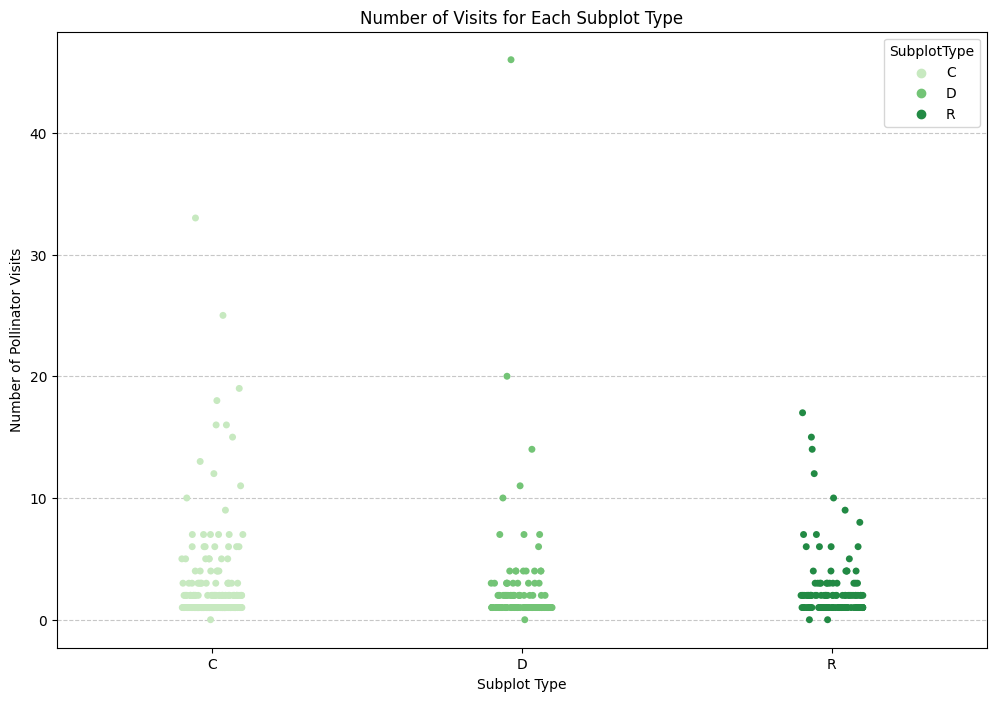

In [56]:
plt.figure(figsize=(12, 8))
sns.stripplot(x='SubplotType', y='NumberVisits', data=df3Poll, hue='SubplotType', palette='Greens', alpha=1, jitter=True)

# Add grid lines
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.title('Number of Visits for Each Subplot Type')
plt.xlabel('Subplot Type')
plt.ylabel('Number of Pollinator Visits')

plt.show()


The following plot shows the mean number of pollinator visits for each subplot.

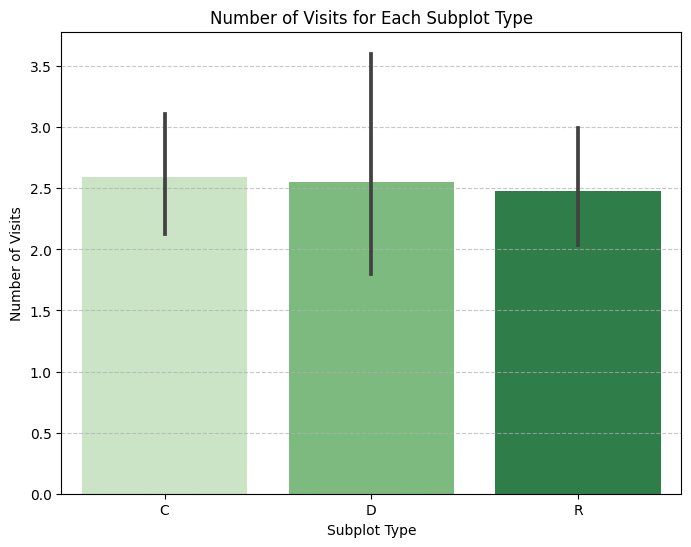

In [57]:
plt.figure(figsize=(8, 6))
sns.barplot(x='SubplotType', y='NumberVisits', data=df3Poll, palette="Greens")

plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.title('Number of Visits for Each Subplot Type')
plt.xlabel('Subplot Type')
plt.ylabel('Number of Visits')
plt.show()


From the visual plots, the data appears to be normally distributed and the means very similar. I will then statistically test the difference between the types of plot with a one-way ANOVA. A one-way is used because the independent variable is only one over three groups.

In [58]:
# Perform ANOVA
anova_result = f_oneway(*[group['NumberVisits'] for name, group in df3Poll.groupby('SubplotType')])

# Display the ANOVA result
print("ANOVA Result:")
print(anova_result)

# Interpret
if anova_result.pvalue < 0.05:
    print("There are significant differences in the number of visits based on SubplotType.")
else:
    print("No significant differences found.")

ANOVA Result:
F_onewayResult(statistic=0.0333872075275229, pvalue=0.9671662586110358)
No significant differences found.


The ANOVA test confirms that there is no significant difference found in the number of visits based on the type of subplot. Therefore, whether the plot is control, drought or roofed does not impact the number of pollinator that visit.

**Plant Species and Pollinator Visits**


For the next part of my analysis, I am interested in predicting binary outcomes. I want to understand the relationship between the plant species variable and the probability of a pollinator visiting.

For this part of the analysis, I use logistic regression to predict the probability of an event happening. In this case, 0 = no visit, greater than 0 = visit. To start with, I need to recode 'NumberVisits' to binary format.

In [59]:
df3Poll['BinaryOutcome'] = (df3Poll['NumberVisits'] > 0).astype(int)


The data in my Plant Species and Subplot Type columns needs to be encoded as it is categorical. This creates three separate columns for each of the subplots.

In [60]:
df_encoded = pd.get_dummies(df3Poll, columns=['SubplotType'], drop_first=False)

In [61]:
print(df_encoded.columns)

Index(['Row', 'PlotID', 'SubplotID', 'PollinatorSpecies', 'PlantSpecies',
       'NumberVisits', 'Rowv1', 'BinaryOutcome', 'SubplotType_C',
       'SubplotType_D', 'SubplotType_R'],
      dtype='object')


I now have a column for each of the subplot types as well as a column called binary outcome which is yes/no pollination visit. I can now fit my logistic regression model.

In [62]:
X = df_encoded[['SubplotType_C', 'SubplotType_D', 'SubplotType_R']]
y = df_encoded['BinaryOutcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# logistic regression model
logreg = LogisticRegression()

# Fit the model
logreg.fit(X_train, y_train)

# Make predictions
predictions = logreg.predict(X_test)

# evaluate accuracy
accuracy = logreg.score(X_test, y_test)
print(f"Accuracy: {accuracy}")

Accuracy: 0.9895833333333334


The model correctly predicted the binary outcome (e.g., 0 or 1) for approximately 98.95% of the observations in the dataset. Now I will check how well the model is performing in terms of true positives, true negatives, false positives, and false negatives.

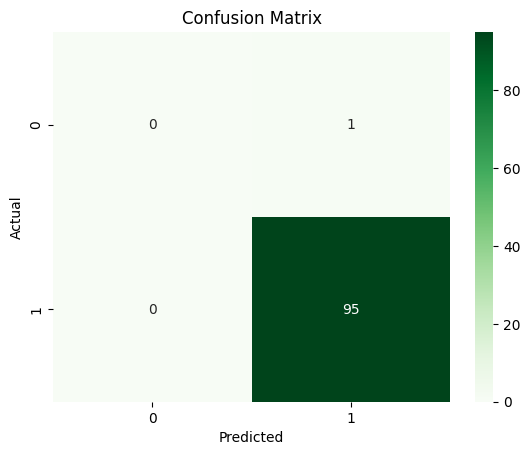

In [63]:
# Confusion Matrix
cm = confusion_matrix(y_test, predictions)
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


Achieving near 100% accuracy, confusion matrix is very rare in real life data. This is likely due to a mistake in the modeling or evaluation. For instance, using the similar data for evaluation and training as well as having a very small dataset for this part of the analysis.



Part III on Pollinator Surveys focused on the interaction between pollinator and plant species. Firstly, I found a statistically significant difference in the number of pollinator visits among different plant species. Further, the analysis seeked to understand whether the number of pollinator visits changed according to location and according to subplot type (control, roofed or drought). I found no statistically significant difference, suggesting that pollinator visit is not influenced by row position nor subplot type.

# Part IV. Nectar


This dataset records the nectar amount and quality for three focal plant species.

I start by visualising the data, selecting the columns and renaming the columns of interest for my analysis and dropping rows with missing values.

In [64]:
df2Nectar.head()

,Plot_ID,Row,ID,Raceme_ID,No_Floral_Units,Plant_Species,Subplot_Type,Volume_Absolute,Concentration_Absolute,Concentration_AverageBlanks,Sugar_Absolute
0,41,6,100,46,2,Lathyrus,Roofed,7.218750,0.470602,0.470602,3.397156
1,41,6,101,46,2,Lathyrus,Roofed,7.187500,0.331686,0.331686,2.383993
2,42,6,109,49,3,Lathyrus,Control,5.625000,0.376631,0.376631,2.118547
3,36,6,526,281,2,Lathyrus,Control,3.828125,0.470602,0.470602,1.801522
4,36,6,240,119,2,Lathyrus,Roofed,6.875000,0.233762,0.233762,1.607112


In [65]:
#select columns
selected_columns2 = df2Nectar[['Plot_ID','Plant_Species','Subplot_Type','Volume_Absolute','Concentration_Absolute', 'Sugar_Absolute']]

In [66]:
df2Nectar = df2Nectar[['Plot_ID', 'Plant_Species','Subplot_Type','Volume_Absolute','Concentration_Absolute', 'Sugar_Absolute']]

In [67]:
#rename columns
df2Nectar.rename(columns={'Concentration_Absolute':'Concentration'}, inplace=True)
df2Nectar.rename(columns={'Subplot_Type':'SubplotID'}, inplace=True)
df2Nectar.rename(columns={'Plant_Species':'PlantSpecies'}, inplace=True)
df2Nectar.rename(columns={'Volume_Absolute':'Volume'}, inplace=True)
df2Nectar.rename(columns={'Sugar_Absolute':'Sugar'}, inplace=True)
df2Nectar.rename(columns={'Plot_ID':'PlotID'}, inplace=True)

<ipython-input-67-4ec545c67be3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2Nectar.rename(columns={'Concentration_Absolute':'Concentration'}, inplace=True)
<ipython-input-67-4ec545c67be3>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2Nectar.rename(columns={'Subplot_Type':'SubplotID'}, inplace=True)
<ipython-input-67-4ec545c67be3>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2Nectar.rename(columns={'Plant_Species':'P

In [68]:
#check
print(df2Nectar)

     PlotID PlantSpecies SubplotID    Volume  Concentration     Sugar
0        41     Lathyrus    Roofed  7.218750       0.470602  3.397156
1        41     Lathyrus    Roofed  7.187500       0.331686  2.383993
2        42     Lathyrus   Control  5.625000       0.376631  2.118547
3        36     Lathyrus   Control  3.828125       0.470602  1.801522
4        36     Lathyrus    Roofed  6.875000       0.233762  1.607112
..      ...          ...       ...       ...            ...       ...
698       2   Onobrychis   Control  0.015625       0.491474  0.007679
699       4   Onobrychis   Control  0.015625            NaN  0.007223
700       4   Onobrychis   Control  0.015625            NaN  0.007223
701       2   Onobrychis    Roofed  0.015625            NaN  0.007223
702       4   Onobrychis   Control  0.015625       0.306590  0.004790

[703 rows x 6 columns]


In [69]:
#drop missing values
df2Nectar.dropna(inplace=True)
print(df2Nectar)

     PlotID PlantSpecies SubplotID    Volume  Concentration     Sugar
0        41     Lathyrus    Roofed  7.218750       0.470602  3.397156
1        41     Lathyrus    Roofed  7.187500       0.331686  2.383993
2        42     Lathyrus   Control  5.625000       0.376631  2.118547
3        36     Lathyrus   Control  3.828125       0.470602  1.801522
4        36     Lathyrus    Roofed  6.875000       0.233762  1.607112
..      ...          ...       ...       ...            ...       ...
694       4   Onobrychis    Roofed  0.023438       0.555709  0.013024
696       3     Prunella   Control  0.031250       0.275803  0.008619
697       4   Onobrychis    Roofed  0.015625       0.541222  0.008457
698       2   Onobrychis   Control  0.015625       0.491474  0.007679
702       4   Onobrychis   Control  0.015625       0.306590  0.004790

[559 rows x 6 columns]


To start my analysis, I calculate mean, median, standard deviation, minimum, and maximum for each variable (Volume, Concentration, Sugar), for each combination of PlantSpecies and SubplotID. To do so, I start by grouping PlantSpecies and SubplotID.

In [70]:
grouped_Nectar = df2Nectar.groupby(['PlantSpecies', 'SubplotID'])

In [71]:
# Calculate mean, median, std, min, and max for each group
summary_stats = grouped_Nectar.agg({
    'Volume': ['mean', 'median', 'std', 'min', 'max'],
    'Concentration': ['mean', 'median', 'std', 'min', 'max'],
    'Sugar': ['mean', 'median', 'std', 'min', 'max']
}).reset_index()

# Print
print(summary_stats)

  PlantSpecies SubplotID    Volume                                          \
                              mean    median       std       min       max   
0     Lathyrus   Control  2.046875  1.562500  1.630727  0.156250  8.281250   
1     Lathyrus   Drought  2.046875  1.562500  1.557910  0.093750  7.812500   
2     Lathyrus    Roofed  2.042614  1.718750  1.690515  0.156250  7.218750   
3   Onobrychis   Control  0.187196  0.140625  0.161802  0.015625  0.734375   
4   Onobrychis   Drought  0.241987  0.187500  0.198789  0.015625  0.734375   
5   Onobrychis    Roofed  0.221106  0.171875  0.238755  0.015625  1.703125   
6     Prunella   Control  0.491693  0.453125  0.359347  0.031250  1.687500   
7     Prunella   Drought  0.408203  0.375000  0.230804  0.062500  0.953125   
8     Prunella    Roofed  0.385826  0.343750  0.225862  0.078125  1.000000   

  Concentration                                             Sugar            \
           mean    median       std       min       max      m

Next, I want to visualise the distribution of 'Volume,' 'Concentration,' and 'Sugar' across different 'PlantSpecies' and 'SubplotID' with a boxplot.

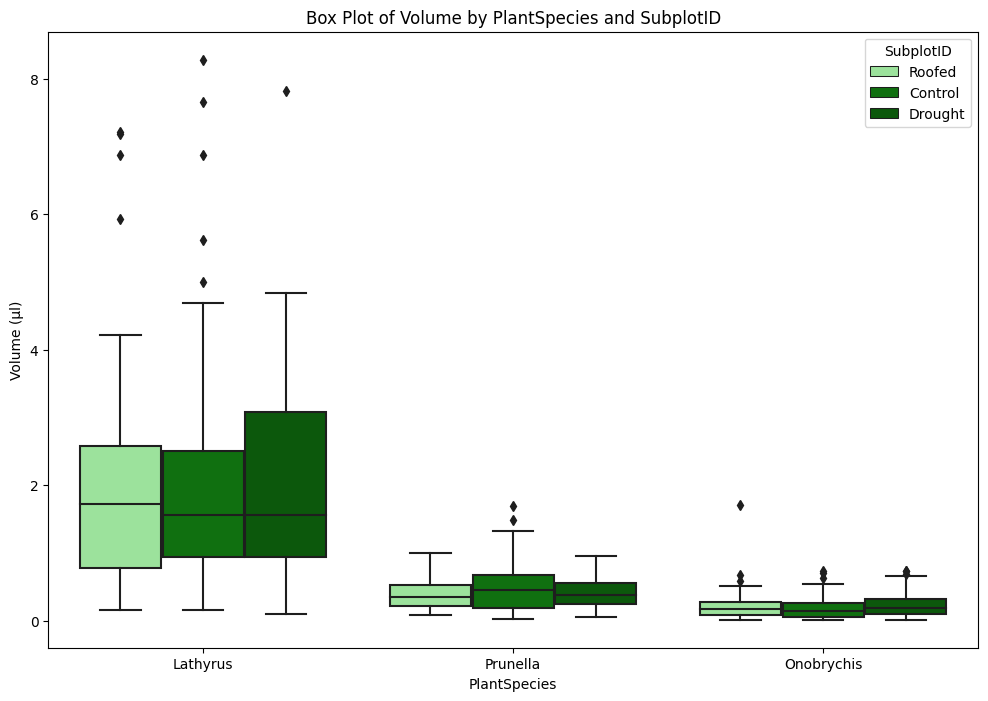

In [72]:
#custom palette
custom = {'Control': 'green', 'Drought': 'darkgreen', 'Roofed': 'lightgreen'}

#plot
plt.figure(figsize=(12, 8))
sns.boxplot(x='PlantSpecies', y='Volume', hue='SubplotID', data=df2Nectar, palette=custom)
plt.title('Box Plot of Volume by PlantSpecies and SubplotID')
plt.ylabel('Volume (μl)')
plt.show()

The first boxplot shows the volume of nectar by plant species and type of subplot. The Lathyrus species has highest volume across all subplot types.
Next, I check the Concentration variable.

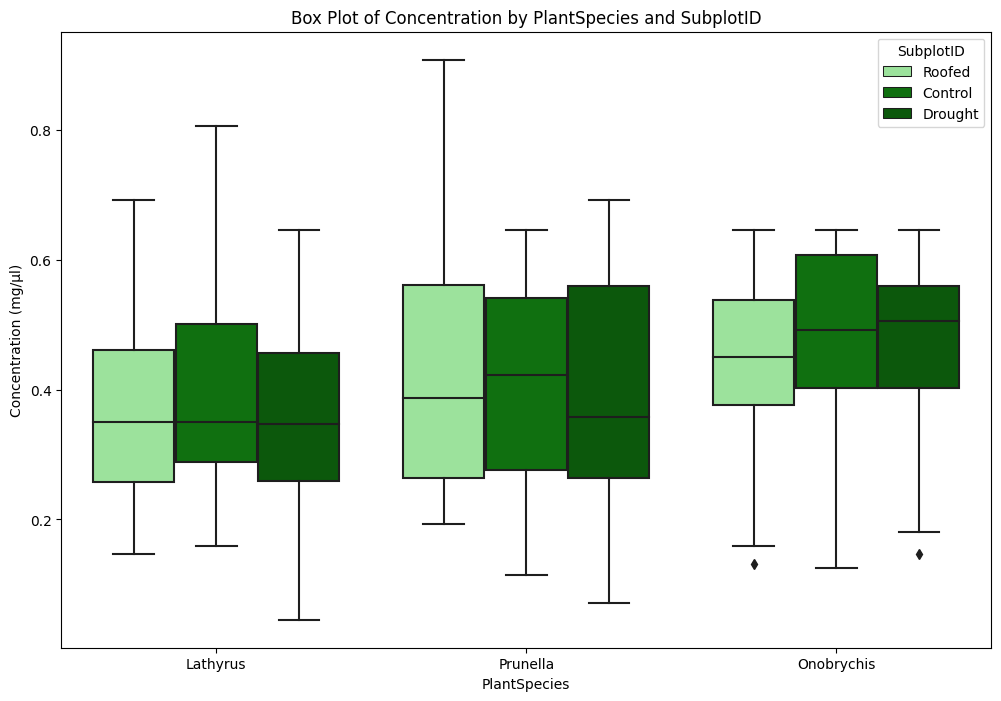

In [73]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='PlantSpecies', y='Concentration', hue='SubplotID', data=df2Nectar, palette=custom)
plt.title('Box Plot of Concentration by PlantSpecies and SubplotID')
plt.ylabel('Concentration (mg/μl)')
plt.show()

The boxplot shows that Concentration is stable and similar across the three subplot types and plant species, with a slight increase for Prunella and Onobrychis species.
Next, I will check the Sugar variable.

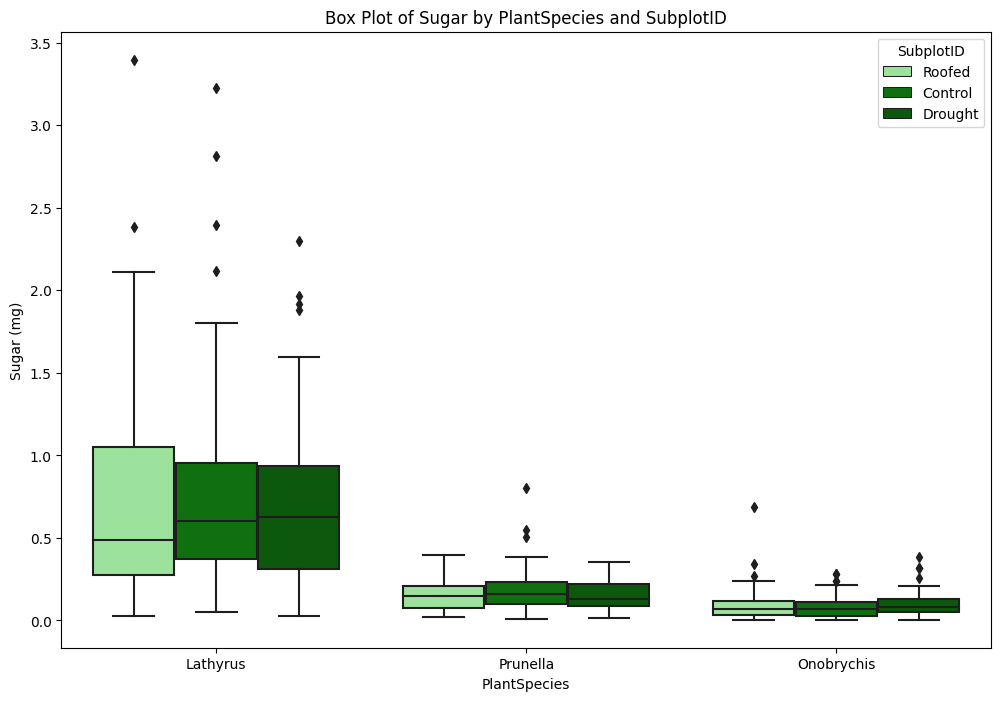

In [74]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='PlantSpecies', y='Sugar', hue='SubplotID', data=df2Nectar, palette=custom)
plt.title('Box Plot of Sugar by PlantSpecies and SubplotID')
plt.ylabel ('Sugar (mg)')
plt.show()

Volume and Sugar are highest for the plant species Lathyrus.

Next, I want to check what are the differences in Volume, Concentration and Sugar by PlotID.

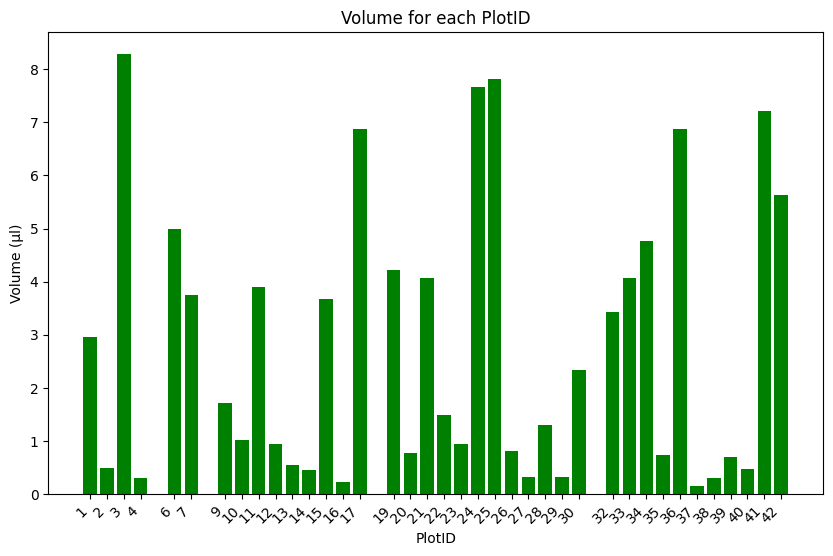

In [75]:
plt.figure(figsize=(10, 6))
plt.bar(df2Nectar['PlotID'], df2Nectar['Volume'], color='green')
plt.xlabel('PlotID')
plt.ylabel('Volume (μl)')
plt.title('Volume for each PlotID')
plt.xticks(df2Nectar['PlotID'].unique(), rotation=45, ha='right')
plt.show()

I want to check which plotID have the highest Volume (μl) and double check according to the diagram which shows functional groups for each plot.

In [76]:
top_volume_values = df2Nectar.nlargest(3, 'Volume')

# Display the top three values for 'Volume'
print(top_volume_values[['PlotID', 'Volume']])


     PlotID   Volume
577       3  8.28125
252      25  7.81250
251      24  7.65625


The highest values are in plotID 3, 24 and 25. Respectively, plot 3 (FG1&2), plot 23 (FG1&2), and plot 25 (FG2).
Now I will do the same process for concentration.

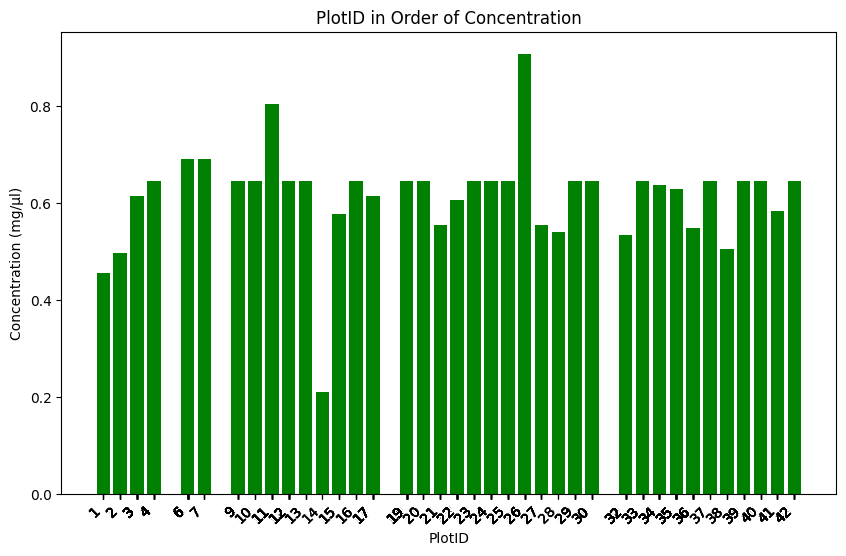

In [77]:
# Plot bar chart with PlotID as tick labels
plt.figure(figsize=(10, 6))
plt.bar(df2Nectar['PlotID'], df2Nectar['Concentration'], color='green')
plt.xlabel('PlotID')
plt.ylabel('Concentration (mg/μl)')
plt.title('PlotID in Order of Concentration')
plt.xticks(df2Nectar['PlotID'],rotation=45, ha='right')
plt.show()


Next I want to check which plotIDs have the highest concentration and double check to which functional group they belong.

In [78]:
# Find the top three unique values for 'Concentration'
top_conc_values = df2Nectar[['PlotID', 'Concentration']].drop_duplicates(subset=['PlotID', 'Concentration']).nlargest(3, 'Concentration')

# Display the top three unique values for 'Concentration'
print(top_conc_values)


     PlotID  Concentration
317      26       0.907627
494      11       0.805062
515      11       0.707566


Plot 11 and 26 have the highest concentration (mg/μl) and both are functional groups FG1&2&3. Next, I will check which plotID have the highest sugar (mg).

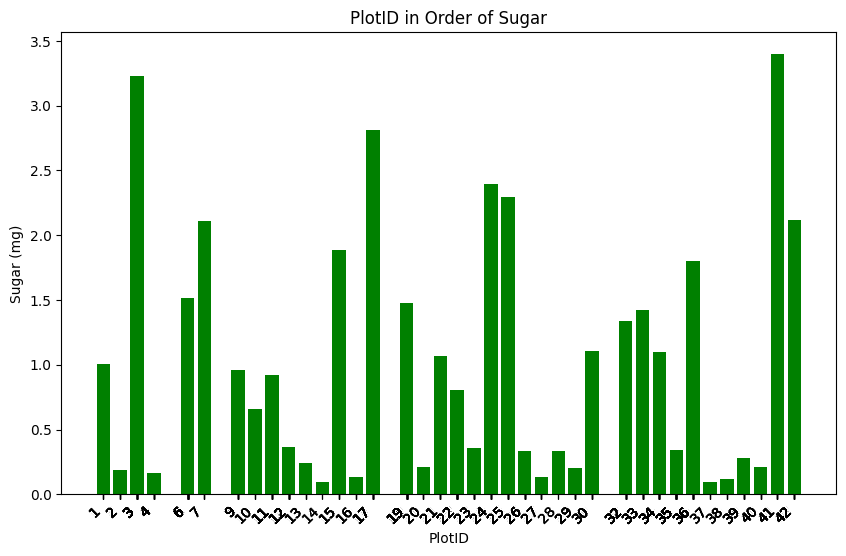

In [79]:
# Plot bar
plt.figure(figsize=(10, 6))
plt.bar(df2Nectar['PlotID'], df2Nectar['Sugar'], color='green')
plt.xlabel('PlotID')
plt.ylabel('Sugar (mg)')
plt.title('PlotID in Order of Sugar')
plt.xticks(df2Nectar['PlotID'],rotation=45, ha='right')
plt.show()


In [80]:
top_sugar_values = df2Nectar.nlargest(3, 'Sugar')

# Display the top three values for 'Sugar'
print(top_sugar_values[['PlotID', 'Sugar']])


     PlotID     Sugar
0        41  3.397156
577       3  3.227344
385      17  2.815690


The three highest values for Sugar (mg) are in plot 3, 17,41. They are all FG1 and FG1&2.

Next, I want to check whether there is a significant difference in Concentration (mg/μl), Sugar (mg) and Volume (μl) between the three different plant species.

In [81]:
# Volume'
anova_volume = f_oneway(df2Nectar[df2Nectar['PlantSpecies'] == 'Lathyrus']['Volume'],
                        df2Nectar[df2Nectar['PlantSpecies'] == 'Onobrychis']['Volume'],
                        df2Nectar[df2Nectar['PlantSpecies'] == 'Prunella']['Volume'])
print(f'ANOVA for Volume: p-value = {anova_volume.pvalue}')


ANOVA for Volume: p-value = 4.844958416600472e-67


The p value shows that there is a highly significant difference in the 'Volume' variable among different plant species.

In [82]:
# Concentration'
anova_conc = f_oneway(df2Nectar[df2Nectar['PlantSpecies'] == 'Lathyrus']['Concentration'],
                        df2Nectar[df2Nectar['PlantSpecies'] == 'Onobrychis']['Concentration'],
                        df2Nectar[df2Nectar['PlantSpecies'] == 'Prunella']['Concentration'])
print(f'ANOVA for Concentration: p-value = {anova_conc.pvalue}')

ANOVA for Concentration: p-value = 1.3936628142060818e-07


The p-value shows that there is a highly significant difference in the 'Concentration' variable among different plant species.

In [83]:
# Sugar
anova_sugar = f_oneway(df2Nectar[df2Nectar['PlantSpecies'] == 'Lathyrus']['Sugar'],
                        df2Nectar[df2Nectar['PlantSpecies'] == 'Onobrychis']['Sugar'],
                        df2Nectar[df2Nectar['PlantSpecies'] == 'Prunella']['Sugar'])
print(f'ANOVA for Sugar: p-value = {anova_sugar.pvalue}')

ANOVA for Sugar: p-value = 4.988418426302932e-61


The p-value shows that there is a highly significant difference in the 'sugar' variable among different plant species.

**Next, I want to check whether there  are differences in 'Volume (μl)' 'Concentration (mg/μl)' and 'Sugar (mg)' levels between different 'SubplotID' categories.**

In [84]:
#'Volume'
anova_volume = f_oneway(df2Nectar[df2Nectar['SubplotID'] == 'Roofed']['Volume'],
                        df2Nectar[df2Nectar['SubplotID'] == 'Drought']['Volume'],
                        df2Nectar[df2Nectar['SubplotID'] == 'Control']['Volume'])
print(f'ANOVA for Volume: p-value = {anova_volume.pvalue}')


ANOVA for Volume: p-value = 0.6025595681597197


The p-value shows that there is no significant difference in the 'Volume' variable between the Roofed and Control and Drought subplots.

In [85]:
#'Concentration'
anova_conc = f_oneway(df2Nectar[df2Nectar['SubplotID'] == 'Roofed']['Concentration'],
                        df2Nectar[df2Nectar['SubplotID'] == 'Drought']['Concentration'],
                        df2Nectar[df2Nectar['SubplotID'] == 'Control']['Concentration'])
print(f'ANOVA for Concentration: p-value = {anova_conc.pvalue}')

ANOVA for Concentration: p-value = 0.5384690479727271


The p-value shows that there is no significant difference in the 'concentration' variable between the Roofed and Control and Drought subplots types.

In [86]:
#'Sugar'
anova_sugar = f_oneway(df2Nectar[df2Nectar['SubplotID'] == 'Roofed']['Sugar'],
                        df2Nectar[df2Nectar['SubplotID'] == 'Drought']['Sugar'],
                        df2Nectar[df2Nectar['SubplotID'] == 'Control']['Sugar'])
print(f'ANOVA for Sugar: p-value = {anova_sugar.pvalue}')

ANOVA for Sugar: p-value = 0.7567770991618261


The p-value shows there is no significant difference in the mean of this variable between the subplot type categories.

Next, I want to see whether there is a combined effect of 'PlantSpecies' and 'SubplotID' on 'Sugar', 'Volume' and 'Concentration'.

In [87]:
model = ols('Sugar ~ PlantSpecies * SubplotID', data=df2Nectar).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

print(anova_table)


                           sum_sq     df           F        PR(>F)
PlantSpecies            45.689508    2.0  178.024301  2.415897e-60
SubplotID                0.014370    2.0    0.055993  9.455515e-01
PlantSpecies:SubplotID   0.091932    4.0    0.179102  9.491858e-01
Residual                70.578088  550.0         NaN           NaN


In [88]:
model = ols('Concentration ~ PlantSpecies * SubplotID', data=df2Nectar).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

print(anova_table)

                           sum_sq     df          F        PR(>F)
PlantSpecies             0.729945    2.0  16.186895  1.476518e-07
SubplotID                0.029398    2.0   0.651908  5.214528e-01
PlantSpecies:SubplotID   0.062845    4.0   0.696814  5.943788e-01
Residual                12.401072  550.0        NaN           NaN


In [89]:
model = ols('Volume ~ PlantSpecies * SubplotID', data=df2Nectar).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

print(anova_table)

                            sum_sq     df           F        PR(>F)
PlantSpecies            366.392726    2.0  200.687355  3.573131e-66
SubplotID                 0.078508    2.0    0.043002  9.579130e-01
PlantSpecies:SubplotID    0.467036    4.0    0.127907  9.722908e-01
Residual                502.064516  550.0         NaN           NaN


The highly significant p-value confirms that the 'PlantSpecies' variable has a significant effect on 'Sugar/Concentration/Volume'. On the other hand, the data confirms that 'SubplotID' alone does not have a significant effect on 'Sugar' production.
The non-significant p-value means that the combined effect of 'PlantSpecies' and 'SubplotID' on 'Sugar/Concentration/Volume'is not significantly different from what would be expected based on the individual effects. This is to be expected since the type of subplot did not have a significant statistical difference in the previous example.

Next, I want to check whether I can predict the amount of sugar and concentration of nectar based on volume with a multiple linear regression model.

In [90]:
X = df2Nectar[['Volume']]  # Independent variable
X = sm.add_constant(X)
y_sugar = df2Nectar['Sugar']  # Dependent variable
y_concentration = df2Nectar['Concentration']  # Dependent variable

# Sugar multiple linear regression model
model_sugar = sm.OLS(y_sugar, X).fit()

# Print coefficients and intercept
print(f"Coefficients: {model_sugar.params}")
print(f"Intercept: {model_sugar.params['const']}")

print("\n")
print("\n")

# Print the summary
print("Regression Summary for Sugar:")
print(model_sugar.summary())
print("\n")
print("\n")



Coefficients: const     0.027825
Volume    0.337570
dtype: float64
Intercept: 0.027825120908197075




Regression Summary for Sugar:
                            OLS Regression Results                            
Dep. Variable:                  Sugar   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.851
Method:                 Least Squares   F-statistic:                     3198.
Date:                Thu, 16 Nov 2023   Prob (F-statistic):          5.77e-233
Time:                        21:56:13   Log-Likelihood:                 178.55
No. Observations:                 559   AIC:                            -353.1
Df Residuals:                     557   BIC:                            -344.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975

In [91]:
# Concentration multiple linear regression model
model_concentration = sm.OLS(y_concentration, X).fit()

# Print coefficients and intercept
print(f"Coefficients: {model_concentration.params}")
print(f"Intercept: {model_concentration.params['const']}")

print("\n")
print("\n")

# Print the summary
print("Regression Summary for Concentration:")
print(model_concentration.summary())

Coefficients: const     0.437832
Volume   -0.026140
dtype: float64
Intercept: 0.4378319558768372




Regression Summary for Concentration:
                            OLS Regression Results                            
Dep. Variable:          Concentration   R-squared:                       0.045
Model:                            OLS   Adj. R-squared:                  0.043
Method:                 Least Squares   F-statistic:                     26.24
Date:                Thu, 16 Nov 2023   Prob (F-statistic):           4.17e-07
Time:                        21:56:13   Log-Likelihood:                 266.17
No. Observations:                 559   AIC:                            -528.3
Df Residuals:                     557   BIC:                            -519.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025     

For 'Sugar': The volume coefficient is approximately 0.3376, and the intercept is approximately 0.0278.
For 'Concentration': The volume coefficient is approximately -0.0261, and the intercept is approximately 0.4378.
This means that for 'Sugar', an increase of one unit in 'Volume' is associated with an increase of approximately 0.3376 units in 'Sugar'.
For 'Concentration', an increase of one unit in 'Volume' is associated with a decrease of approximately 0.0261 units in 'Concentration'.

For what concerns the regression summary for concentration, R squared is 0.045 is for Concentration and 0.852 for Sugar. In this case, approximately 85.2% of the variance in 'Sugar' is explained by 'Volume' and 4.5% of the variation in concentration can be explained by Volume.
Prob (F-statistic) is the p-value means that the model is statistically significant.
Next, I want to visualise this data.


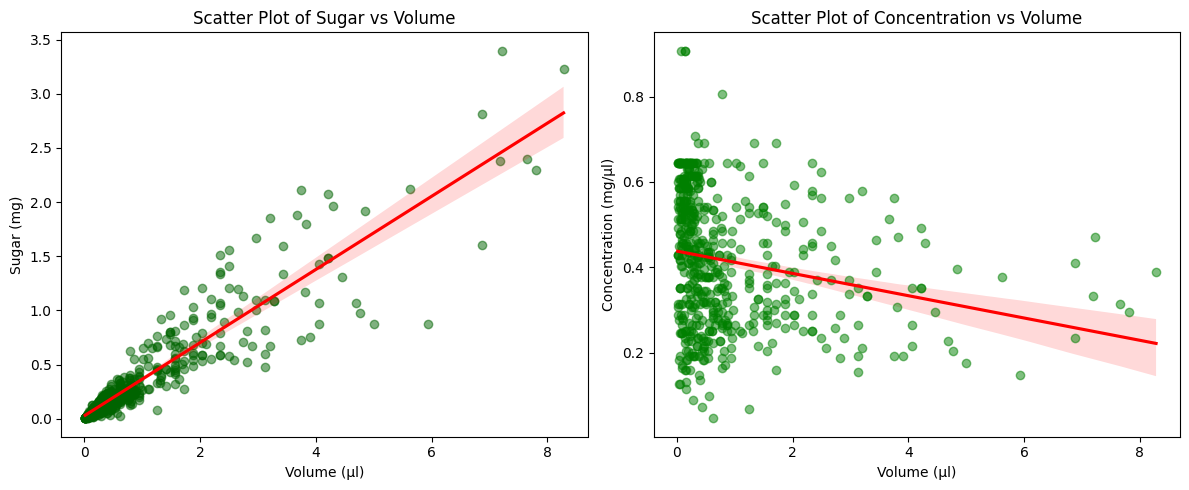

In [92]:
volume = df2Nectar['Volume']
sugar = df2Nectar['Sugar']
concentration = df2Nectar['Concentration']

plt.figure(figsize=(12, 5))

# Scatter plot for Sugar
plt.subplot(1, 2, 1)
plt.scatter(volume, sugar, color='darkgreen', alpha=0.5)
sns.regplot(x=volume, y=sugar, scatter=False, color='red', label='Regression Line')
plt.title('Scatter Plot of Sugar vs Volume')
plt.xlabel('Volume (μl)')
plt.ylabel('Sugar (mg)')

# Scatter plot for Concentration
plt.subplot(1, 2, 2)
sns.regplot(x=volume, y=concentration, scatter=False, color='red', label='Regression Line')
plt.scatter(volume, concentration, color='green', alpha=0.5)
plt.title('Scatter Plot of Concentration vs Volume')
plt.xlabel('Volume (μl)')
plt.ylabel('Concentration (mg/μl)')

plt.tight_layout()
plt.show()


Based on the scatterplot, I want to check if the relationship between Sugar and Volume is linear and if the relationship between Concentration and Volume is linear.

**-Relationship between Sugar and Volume**

I will start with a Residual plot followed by the calculation of the correlation coefficient.

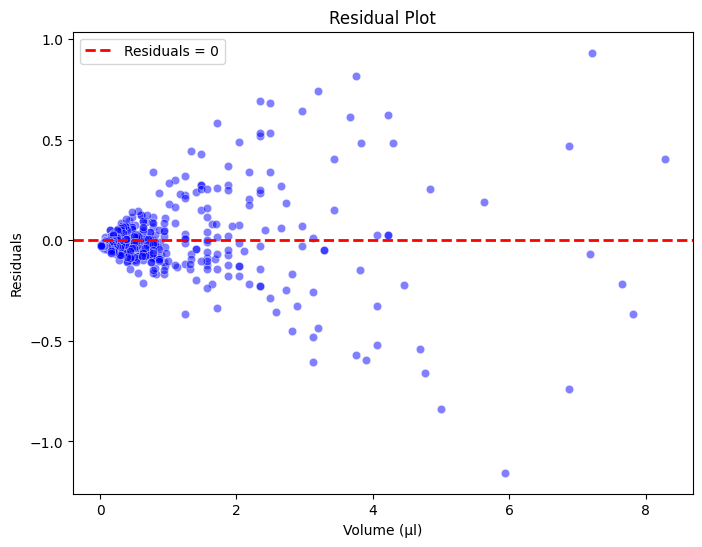

In [93]:
X = df2Nectar['Volume']
y = df2Nectar['Sugar']

# Fit the linear regression model
model = sm.OLS(y, sm.add_constant(X)).fit()

# Calculate residuals
residuals = model.resid

# Create a residual plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X, y=residuals, color='blue', alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--', linewidth=2, label='Residuals = 0')
plt.title('Residual Plot')
plt.xlabel('Volume (μl)')
plt.ylabel('Residuals')
plt.legend()
plt.show()


In [94]:
correlation_coefficient = df2Nectar['Sugar'].corr(df2Nectar['Volume'])
print(f"Correlation Coefficient: {correlation_coefficient}")


Correlation Coefficient: 0.9228528777032429


A correlation coefficient of 0.9229 indicates a very strong positive linear relationship between the two variables. As volume increases , so does sugar.

- Relationship between Concentration and Volume.

In [95]:
correlation_coefficient = df2Nectar['Concentration'].corr(df2Nectar['Volume'])
print(f"Correlation Coefficient: {correlation_coefficient}")

Correlation Coefficient: -0.21209494175381555


The correlation coefficient suggests a weak negative linear relationship between 'Volume' and 'Concentration'. As the 'Volume' increases, 'Concentration' tends to decrease, but the relationship is not very strong.

- Finally, I want to check the relationship between sugar and concentration.

In [96]:
correlation_coefficient = df2Nectar['Sugar'].corr(df2Nectar['Concentration'])
print(f"Correlation Coefficient: {correlation_coefficient}")


Correlation Coefficient: 0.00831480984316504


Any relationship present is very weak.  This would mean that changes in 'Concentration' do not predict changes in 'Sugar' in a meaningful way.

Part IV on Nectar analysed volume, concentration and sugar metrics across the combinations of plant species and subplot types. The results were overlayed with the diagram from the functional groups (FG), trying to reveal if specific groups had a higher production of nectar.
Further, concentration, sugar and volume were analysed for three different plant species, revealing a statistically significant difference. On the other hand, there was no statistically significant difference for the subplotID categories.
The analysis then ventures into predictions, aiming to understand the relation between volume, sugar and concentration. This revealed that as volume increases, so does sugar content.

# Part V. Prop Nectar

This dataset records the proportion of flowers with nectar for three focal plant species.
I want to find the likelihood that a flower tested has nectar according to plant species (three types of plant: Lathyrus, Prunella, Onobrichys) and plot condition (drought, control, roofed).
I start with visualising the data in the PropNectar Excel sheet, renaming columns and dropping missing values.


In [97]:
df4PropNectar.head()

,Plot_ID,Row,Raceme_ID,Plant_Species,Subplot_Type,CountWithNectar,TotalFlowersTested
0,1,1,196,Lathyrus,D,1,3
1,1,1,197,Lathyrus,C,3,3
2,1,1,137,Prunella,D,3,3
3,1,1,136,Prunella,C,0,1
4,1,1,135,Prunella,R,1,3


In [98]:
#Rename columns for consistency with other Excel sheets
df4PropNectar.rename(columns={'Subplot_Type':'SubplotID'}, inplace=True)
df4PropNectar.rename(columns={'Plant_Species':'PlantSpecies'}, inplace=True)

In [99]:
# Check that the columns have been selected and renamed
print(df4PropNectar)

     Plot_ID  Row  Raceme_ID PlantSpecies SubplotID  CountWithNectar  \
0          1    1        196     Lathyrus         D                1   
1          1    1        197     Lathyrus         C                3   
2          1    1        137     Prunella         D                3   
3          1    1        136     Prunella         C                0   
4          1    1        135     Prunella         R                1   
..       ...  ...        ...          ...       ...              ...   
419       42    6        133     Lathyrus         C                2   
420       42    6         50     Lathyrus         D                0   
421       42    6         49     Lathyrus         C                2   
422       42    6         48     Lathyrus         R                1   
423       42    6        134     Lathyrus         R                0   

     TotalFlowersTested  
0                     3  
1                     3  
2                     3  
3                     1  
4    

In [100]:
# Drop rows containing missing values from the analysis
df4PropNectar.dropna(inplace=True)
print(df4PropNectar)

     Plot_ID  Row  Raceme_ID PlantSpecies SubplotID  CountWithNectar  \
0          1    1        196     Lathyrus         D                1   
1          1    1        197     Lathyrus         C                3   
2          1    1        137     Prunella         D                3   
3          1    1        136     Prunella         C                0   
4          1    1        135     Prunella         R                1   
..       ...  ...        ...          ...       ...              ...   
419       42    6        133     Lathyrus         C                2   
420       42    6         50     Lathyrus         D                0   
421       42    6         49     Lathyrus         C                2   
422       42    6         48     Lathyrus         R                1   
423       42    6        134     Lathyrus         R                0   

     TotalFlowersTested  
0                     3  
1                     3  
2                     3  
3                     1  
4    

In [101]:
# Calculate the probability of a flower having nectar
df4PropNectar['Probability'] = df4PropNectar['CountWithNectar']/df4PropNectar['TotalFlowersTested']
print(df4PropNectar)

     Plot_ID  Row  Raceme_ID PlantSpecies SubplotID  CountWithNectar  \
0          1    1        196     Lathyrus         D                1   
1          1    1        197     Lathyrus         C                3   
2          1    1        137     Prunella         D                3   
3          1    1        136     Prunella         C                0   
4          1    1        135     Prunella         R                1   
..       ...  ...        ...          ...       ...              ...   
419       42    6        133     Lathyrus         C                2   
420       42    6         50     Lathyrus         D                0   
421       42    6         49     Lathyrus         C                2   
422       42    6         48     Lathyrus         R                1   
423       42    6        134     Lathyrus         R                0   

     TotalFlowersTested  Probability  
0                     3     0.333333  
1                     3     1.000000  
2                 

The new 'Probability' column represents the probability of a flower having nectar for each row. Next, I will calculate the probability for each combination of 'PlantSpecies' and 'Subplot Type' to have nectar. This gives me information on which plant species is more likely to have nectar, as well as whether the plot conditions (drought, roofed and control) change the probability.

In [102]:
# Group by Plant Species and SubplotType, calculate mean for each group
grouped_df4PropNectar = df4PropNectar.groupby (['PlantSpecies', 'SubplotID']).mean()['Probability'].reset_index()
# Rename the 'Probability' column to 'MeanProbability'
grouped_df4PropNectar = grouped_df4PropNectar.rename(columns={'Probability': 'MeanProbability'})

print(grouped_df4PropNectar)

  PlantSpecies SubplotID  MeanProbability
0     Lathyrus         C         0.684028
1     Lathyrus         D         0.526515
2     Lathyrus         R         0.659420
3   Onobrychis         C         0.833333
4   Onobrychis         D         0.654472
5   Onobrychis         R         0.753968
6     Prunella         C         0.751634
7     Prunella         D         0.500000
8     Prunella         R         0.611111


**Nectar Probability and Plant Species**

Now I want to visualise the probability of having flowers with nectar by plant species.

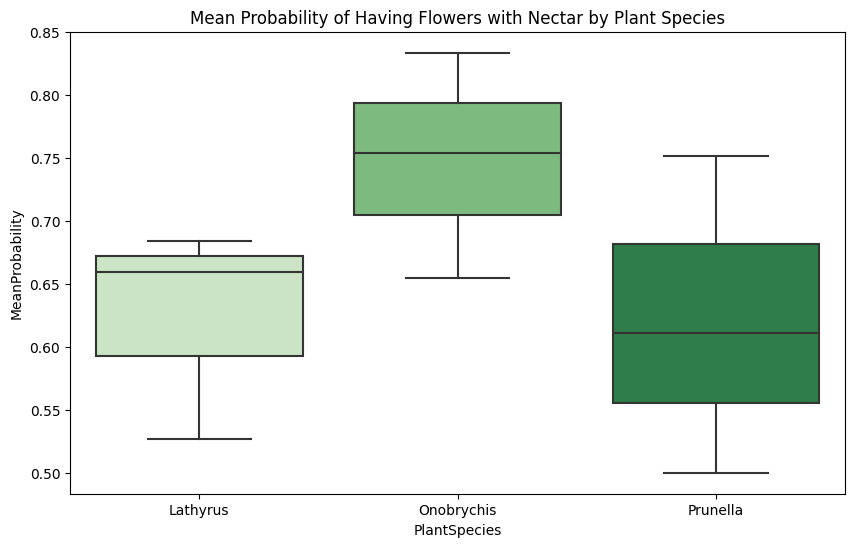

In [103]:
green_palette = sns.color_palette('Greens')
plt.figure(figsize=(10, 6))
sns.boxplot(x='PlantSpecies', y='MeanProbability', data=grouped_df4PropNectar, palette='Greens')
plt.title('Mean Probability of Having Flowers with Nectar by Plant Species')
plt.show()

Each box represents the distribution of probabilities for each plant species.Looking at the probabilities, it looks like the plant species "Onobrychis" has a higher probability than the others. I want to statistically confirm that the plant species Onobrychis has the highest probability of having flowers with nectar compared to the other plant species (Lathyrus and Prunella), regardless of the type of subplot condition. Given my small dataset, I will use the non parametric alternative Kruskal-Wallis.

In [104]:
# Extract the probability data for each plant species
data_lathyrus = grouped_df4PropNectar[grouped_df4PropNectar['PlantSpecies'] == 'Lathyrus']['MeanProbability']
data_onobrychis = grouped_df4PropNectar[grouped_df4PropNectar['PlantSpecies'] == 'Onobrychis']['MeanProbability']
data_prunella = grouped_df4PropNectar[grouped_df4PropNectar['PlantSpecies'] == 'Prunella']['MeanProbability']

# Perform Kruskal-Wallis test
statistic, p_value = kruskal(data_lathyrus, data_onobrychis, data_prunella)

# Display the results
print(f'Kruskal-Wallis Statistic: {statistic}')
print(f'P-value: {p_value}')

# Interpret the results
if p_value < 0.05:
    print('There is evidence that the mean probability of having flowers with nectar differs between plant species.')
else:
    print('There is no significant difference in the mean probability of having flowers with nectar between plant species.')


Kruskal-Wallis Statistic: 2.4888888888888943
P-value: 0.2881009197455084
There is no significant difference in the mean probability of having flowers with nectar between plant species.


There is no significant difference in the probability of having flowers with nectar differs between plant species and that the probability is higher for Onobrychis.

**Nectar Probability and Subplot Type**

Then, I want to visualise whether there is a difference in probability based on the type of subplot, drought/control/roofed.

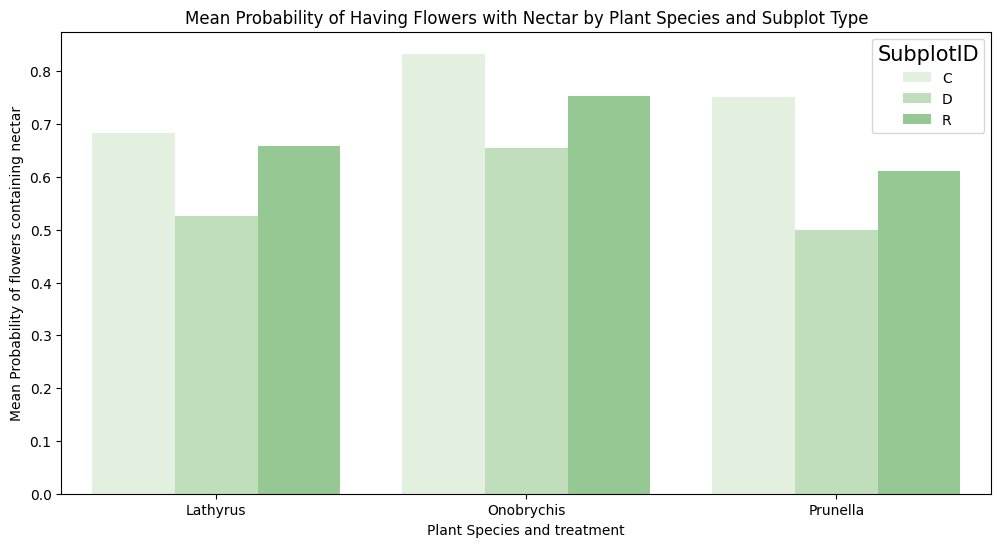

In [105]:
# Set the color palette
green_palette = sns.color_palette('Greens')

# Create a grouped bar plot using grouped_df4PropNectar
plt.figure(figsize=(12, 6))
sns.barplot(x='PlantSpecies', y='MeanProbability', hue='SubplotID', data=grouped_df4PropNectar, palette=green_palette)
plt.title('Mean Probability of Having Flowers with Nectar by Plant Species and Subplot Type')
plt.xlabel('Plant Species and treatment')
plt.ylabel('Mean Probability of flowers containing nectar')
plt.legend(title='SubplotID', title_fontsize='15')
plt.show()


It looks like the probability of having a flower with nectar is lower for the "D" subplot, which is drought. I want to check whether this is statistically significant with the t-test. The null hypothesis is that there is no difference in probabilities between the three subplot types. The alternative hypotesis is that the probability that a flower has nectar is lower for drought subplots.

In [106]:
# Separate data for SubplotID "D" and other SubplotIDs
data_d = grouped_df4PropNectar[grouped_df4PropNectar['SubplotID'] == 'D']['MeanProbability']
data_other = grouped_df4PropNectar[grouped_df4PropNectar['SubplotID'] != 'D']['MeanProbability']

# Perform independent two-sample t-test
t_stat, p_value = ttest_ind(data_d, data_other)

# Display the results
print(f'T-statistic: {t_stat}')
print(f'P-value: {p_value}')

# Interpret the results
if p_value < 0.05:
    print('The difference in mean probabilities is statistically significant.')
else:
    print('There is no significant difference in mean probabilities.')


T-statistic: -2.727876352576992
P-value: 0.029428809996804514
The difference in mean probabilities is statistically significant.


The null hypothesis is rejected, there is a statistically significant difference in the probabilities.

**Binomial Distribution**


Next, I use the probability column to assess the binomial distribution of my data.
In the context of pollination, I use binomial distribution to model the probability of flowers tested (n_trials) having nectar (p_success) as it is a binary outcome (yes/no nectar) and the trials on the flowers are independent.

In [107]:
# Set the parameters for binomial distribution
n_trials = df4PropNectar.groupby(['PlantSpecies', 'SubplotID'])['TotalFlowersTested'].mean()
p_success = df4PropNectar.groupby(['PlantSpecies', 'SubplotID'])['Probability'].mean()

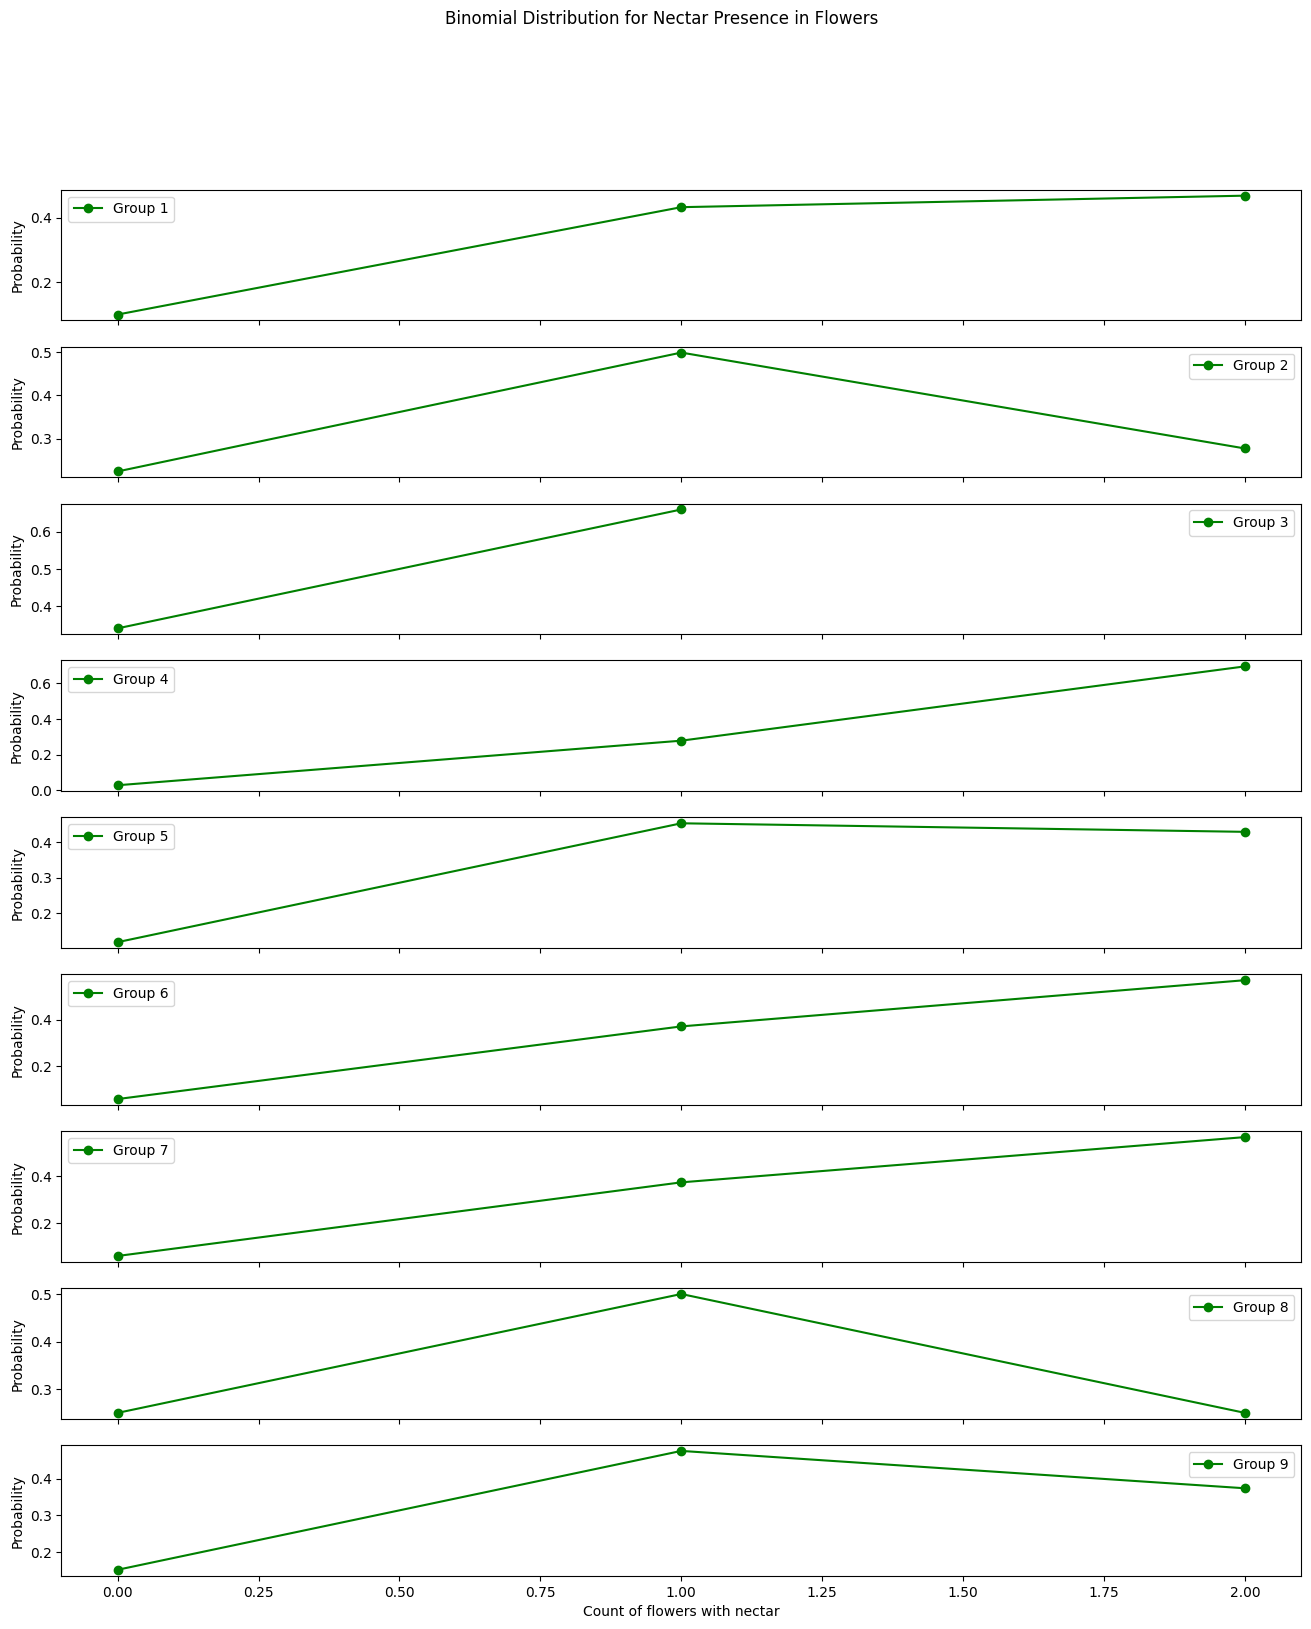

In [108]:
fig, ax = plt.subplots(len(grouped_df4PropNectar), 1, figsize=(16, 18), sharex=True)
for i, (n, p) in enumerate(zip(n_trials, p_success)):
    x = np.arange(0, int(n) + 1)
    pmf = binom.pmf(x, int(n), p)
    ax[i].plot(x, pmf, marker='o', linestyle='-', color='green', label=f'Group {i + 1}')
    ax[i].set_ylabel('Probability')
    ax[i].legend()

plt.xlabel('Count of flowers with nectar')
plt.suptitle('Binomial Distribution for Nectar Presence in Flowers')
plt.show()

This code should generate a set of subplots, where each subplot represents the binomial distribution for a group of data and the successes pollinations for each flower tested for each of the groups. On the X axis, the count of the flowers with nectar and on the y axis, the probability.
As a reminder:


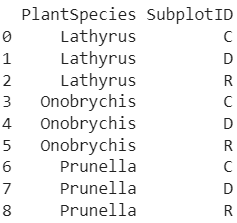

The highest probability is always linked to ther plant species Onobrychis, regardless of subplot types. In general, the probability is higher for subplot types "control".
However, the low sample size and low variability means that this is non-typical binomial distribution.

The analysis for Part V on Prop Nectar focused on the probability of a flower having nectar, focusing on three plant species and three plot conditions. Firstly, the Onobrychis plant species has a higher probability of a flower having nectar per flower tested.
Further, the analysis revealed that the probability of having nectar is lower in flowers in drought (D) subplots.

# Conclusions

In conclusion, this analysis provides insights into the intricate dynamics of floral resources, pollinator interactions, and the impact of experimental drought conditions on plant communities.

Firstly, the investigation focused on the number of floral units across different subplot types and conditions. The examination of drought effects across functional groups demonstrated a statistically significant difference, emphasizing the vulnerability of certain plant traits to water scarcity.
The following analysis focused on pollinator surveys and discovered a significant difference in the number of pollinator visits among diverse plant species. However, neither the location nor the subplot type exhibited a statistically significant influence on pollinator visits.
Nectar analysis in Part IV delved into the metrics of volume, concentration, and sugar across different combinations of plant species and subplot types, integrating insights from the functional groups (FG). However, the quality and quantity of nectar do not appear to be influenced by the type of subplot.
Part V examined the probability of flowers having nectar. The Onobrychis plant species exhibited a higher probability of nectar presence per flower, while drought subplots demonstrated a lower probability.

The findings from this analysis contribute to our understanding of the complex interplay between plants and pollinators, indicating some aspects in which drought could have consequences on pollinator behaviour.
